# Daily iOS Screen Time Patterns and Their Relationship to Social-Media Addiction

**Course:** CCDATSCL — Data Science  

The dataset consists of 81 daily records for approx. 12 weeks (November 19, 2025 to February 7, 2026) collected from a single participant using Apple iOS Screen Time and self-reported goal-violation data. Each row represents one full day and includes nine variables that capture different aspects of digital behavior. These variables are: total screen time (all apps), social media app usage time, social intensity ratio (proportion of screen time spent on social apps), total device pickups, first pickups focused on social apps, total notifications received, notifications from social apps, the number of distinct social apps used, and a binary indicator of whether the participant exceeded their intended social media usage for that day. All metrics, except for goal-violation, are objectively recorded by the device, providing an accurate and detailed view of daily smartphone and social media habits. The dataset enables analysis of how specific digital behaviors relate to self-regulation and goal-violation over time.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import ttest_ind

---

## I. INTRODUCTION

**Topic:** This study examines the relationship between daily iOS Screen Time metrics and social media addiction–related behaviour, specifically goal-violation (spending more time on social media than intended).

**Importance:** Smartphone overuse and social media addiction are growing concerns among young adults and college students. Excessive screen time has been linked to reduced academic performance, sleep disruption, anxiety, and diminished well-being. Understanding the specific digital behavioural metrics that predict loss of self-control over social media use can inform healthier technology habits.

**Research Gap:** While many studies examine screen time at a population level using surveys, few use objective, device-recorded screen time data collected over an extended period from a single participant. This study uses real iOS Screen Time data — not self-estimated usage — to explore which metrics are most predictive of self-reported goal-violation.

**Research Objectives:**
1. To determine whether daily iOS Screen Time metrics are significantly associated with daily goal-violation behaviour
2. To identify which specific screen time metrics are the strongest predictors of goal-violation
3. To build a logistic regression model that classifies days as goal-violation or non-violation based on screen time metrics

**Research Questions:**
1. Is there a statistically significant association between daily iOS Screen Time metrics and daily social media goal-violation?
2. Which screen time metrics are the strongest predictors of goal-violation?
3. Can a logistic regression model accurately classify goal-violation days using screen time data?

---

## II. LITERATURE REVIEW

Previous research has established links between excessive smartphone use and addictive behaviours:

- **Screen time and well-being:** Studies have shown that higher daily screen time correlates with increased stress, reduced sleep quality, and lower life satisfaction among young adults [1].
- **Social media and self-regulation:** Research on social media addiction highlights that users who set usage goals frequently fail to meet them, a pattern consistent with behavioural addiction frameworks [2].
- **Notification-driven engagement:** Push notifications have been identified as a key driver of compulsive phone checking, increasing both pickup frequency and total usage time [3].
- **Objective vs. self-reported data:** Most studies rely on self-reported screen time, which tends to underestimate actual usage. Studies using objective iOS/Android tracking data found significantly higher usage than participants estimated [4].

**How this study differs:**
- Uses **objective iOS Screen Time data** rather than self-reported estimates
- Focuses on a **single participant over 81 days** (N-of-1 design), enabling deep individual-level analysis
- Combines correlation analysis with logistic regression modeling
- Examines a unique combination of metrics: pickups, notifications, social intensity ratio, and app diversity

*Note: Detailed references should be added in the final IEEE paper submission.*

In [125]:
url = "https://raw.githubusercontent.com/ellaangela/CCDATSCL_PROJECT_COM222/refs/heads/main/dataset%20compiled.csv"

df_data = pd.read_csv(url)
print(df_data)

    Total screen time IN MINUTES (all apps)  \
0                                       589   
1                                       511   
2                                       607   
3                                       715   
4                                       499   
..                                      ...   
76                                      446   
77                                      513   
78                                      515   
79                                      223   
80                                      416   

    Social apps total time IN MINUTES  Social Intensity Ratio  \
0                                 479                0.813243   
1                                 408                0.798434   
2                                 505                0.831960   
3                                 560                0.783217   
4                                 399                0.799599   
..                                ...        

In [126]:
print("First 5 rows of df_data:")
print(df_data.head())

print("\nDataFrame Info:")
df_data.info()

print("\nDescriptive Statistics:")
print(df_data.describe())

print("\nShape of the DataFrame:")
print(df_data.shape)

First 5 rows of df_data:
   Total screen time IN MINUTES (all apps)  Social apps total time IN MINUTES  \
0                                      589                                479   
1                                      511                                408   
2                                      607                                505   
3                                      715                                560   
4                                      499                                399   

   Social Intensity Ratio  Pickups (total)  First Pickups (social apps)  \
0                0.813243              114                           53   
1                0.798434              135                           81   
2                0.831960              132                           76   
3                0.783217              135                           87   
4                0.799599               85                           38   

   Notifications (total)  Notificatio

       Total screen time IN MINUTES (all apps)  \
count                                81.000000   
mean                                528.580247   
std                                 115.942320   
min                                 222.000000   
25%                                 464.000000   
50%                                 536.000000   
75%                                 600.000000   
max                                 819.000000   

       Social apps total time IN MINUTES  Social Intensity Ratio  \
count                          81.000000               81.000000   
mean                          430.864198                0.809996   
std                           109.648843                0.083014   
min                           139.000000                0.527778   
25%                           361.000000                0.772824   
50%                           451.000000                0.811209   
75%                           500.000000                0.865204   
max  

In [127]:

# Quick column inspection
print("Column Names:")
print(df_data.columns.tolist())
print("\nData Types:")
print(df_data.dtypes)
print("\nDate Range:")
if 'Date' in df_data.columns:
    print(f"From {df_data['Date'].min()} to {df_data['Date'].max()}")


Column Names:
['Total screen time IN MINUTES (all apps)', 'Social apps total time IN MINUTES', 'Social Intensity Ratio', 'Pickups (total)', 'First Pickups (social apps)', 'Notifications (total)', 'Notifications (social)', 'Number of distinct social apps used', 'Daily goal-violation']

Data Types:
Total screen time IN MINUTES (all apps)      int64
Social apps total time IN MINUTES            int64
Social Intensity Ratio                     float64
Pickups (total)                              int64
First Pickups (social apps)                  int64
Notifications (total)                        int64
Notifications (social)                       int64
Number of distinct social apps used          int64
Daily goal-violation                         int64
dtype: object

Date Range:


---

## III. METHODOLOGY

### A. Participants

- **Subject:** Single participant (N=1), college student
- **Demographics:** Young adult, undergraduate student at National University Philippines

### B. Data Collection Methods

**Data Source:** Objective iOS Screen Time metrics collected from Apple Screen Time
- **Frequency:** Daily data points (each row represents one full 24-hour day)
- **Duration:** November 19, 2025 to February 7, 2026
- **Sample Size:** 81 daily observations from one participant
- **Tools Used:** Apple iOS Screen Time (automatic tracking), manual daily self-report for goal-violation

**Variables Tracked:**
1. Total screen time (all apps)  
2. Social apps total time (in minutes)  
3. Social Intensity Ratio  
4. Pickups (total)  
5. First Pickups (social apps)  
6. Notifications (total)  
7. Notifications (social)  
8. Number of distinct social apps used  
9. Daily goal-violation (self-reported)

### C. Operational Definitions

See Variable Dictionary below (Section III-D).

### D. Data Description

**Ethical Considerations:**
- Data is from a consenting participant (self-collection)
- No sensitive personal information (names, identifiers removed)
- Data represents objective device metrics only
- Study focuses on individual behavior patterns without identifying information

**Variable Dictionary:**

In [128]:
# Create a variable dictionary
variable_dict = {
    'Variable Name': [
        'Total screen time IN MINUTES (all apps)',
        'Social apps total time IN MINUTES',
        'Social Intensity Ratio',
        'Pickups (total)',
        'First Pickups (social apps)',
        'Notifications (total)',
        'Notifications (social)',
        'Number of distinct social apps used',
        'Daily goal-violation'
    ],
    'Type': ['Numeric (Continuous)', 'Numeric (Continuous)', 'Numeric (Continuous)', 
             'Numeric (Discrete)', 'Numeric (Discrete)', 'Numeric (Discrete)', 
             'Numeric (Discrete)', 'Numeric (Discrete)', 'Categorical (Binary)'],
    'Unit': ['Minutes', 'Minutes', 'Ratio (0-1)', 'Count', 'Count', 'Count', 
             'Count', 'Count', '0 or 1'],
    'Description': [
        'Total daily screen time across all apps on the device',
        'Time spent on social media apps only',
        'Proportion of total screen time spent on social apps',
        'Total number of times the device was picked up',
        'Number of times the device was first unlocked with social app focus',
        'Total daily notifications received',
        'Notifications from social media apps only',
        'Number of unique/different social apps used that day',
        'Self-reported goal-violation (1=Yes, spent more time than intended; 0=No)'
    ]
}

df_variables = pd.DataFrame(variable_dict)
print("DATA DESCRIPTION - VARIABLE DICTIONARY")
print("=" * 120)
print(df_variables.to_string(index=False))

DATA DESCRIPTION - VARIABLE DICTIONARY
                          Variable Name                 Type        Unit                                                               Description
Total screen time IN MINUTES (all apps) Numeric (Continuous)     Minutes                     Total daily screen time across all apps on the device
      Social apps total time IN MINUTES Numeric (Continuous)     Minutes                                      Time spent on social media apps only
                 Social Intensity Ratio Numeric (Continuous) Ratio (0-1)                      Proportion of total screen time spent on social apps
                        Pickups (total)   Numeric (Discrete)       Count                            Total number of times the device was picked up
            First Pickups (social apps)   Numeric (Discrete)       Count       Number of times the device was first unlocked with social app focus
                  Notifications (total)   Numeric (Discrete)       Count       

### E. Data Cleaning & Preprocessing

### D. Data Cleaning

This subsection documents every data-cleaning and preprocessing step applied to the 81-row, 9-variable iOS Screen Time dataset before analysis. The cleaning pipeline covered four areas: handling missing values, detecting and evaluating outliers, verifying data-type consistency, and standardizing feature scales for modeling. Because the raw data was collected through Apple's automated Screen Time tracker (with only the goal-violation variable self-reported daily), the dataset arrived in an unusually clean state — most steps below confirmed that no modification was needed, which is itself an important finding to document for reproducibility.

---

#### 1. Handling Missing Values

In [129]:
# ============================================================
# STEP 1: CHECK FOR MISSING VALUES
# ============================================================
# Inspect every column for null / NaN entries using pandas'
# isnull().sum() method applied across all 81 rows × 9 columns.

print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_per_column = df_data.isnull().sum()
print(missing_per_column)
print(f"\nTotal missing values across entire dataset: {missing_per_column.sum()}")
print(f"Total cells inspected: {df_data.shape[0]} rows × {df_data.shape[1]} columns = {df_data.shape[0] * df_data.shape[1]}")
print(f"Completeness rate: {(1 - missing_per_column.sum() / (df_data.shape[0] * df_data.shape[1])) * 100:.2f}%")

MISSING VALUES ANALYSIS
Total screen time IN MINUTES (all apps)    0
Social apps total time IN MINUTES          0
Social Intensity Ratio                     0
Pickups (total)                            0
First Pickups (social apps)                0
Notifications (total)                      0
Notifications (social)                     0
Number of distinct social apps used        0
Daily goal-violation                       0
dtype: int64

Total missing values across entire dataset: 0
Total cells inspected: 81 rows × 9 columns = 729
Completeness rate: 100.00%


The dataset was inspected for missing values across all nine variables using pandas' `isnull().sum()` method. The analysis confirmed that the dataset contains **zero missing values** across all 81 rows and 9 columns, yielding a 100% completeness rate. This outcome is expected given the data collection design: eight of the nine variables were recorded automatically by Apple iOS Screen Time at the device level, which logs metrics continuously without user intervention, while the ninth variable (Daily goal-violation) was captured through a consistent daily self-report by the participant. Because every observation was already complete, **no imputation, row deletion, or interpolation was necessary**. This is a notable strength of using objective, device-recorded metrics rather than survey-based collection methods, which are far more prone to incomplete responses, skipped items, or participant attrition.

---

#### 2. Detecting Outliers Using the IQR Method

In [130]:
# ============================================================
# STEP 2: OUTLIER DETECTION USING THE IQR METHOD
# ============================================================
# The Interquartile Range (IQR) method flags any value falling
# below Q1 − 1.5×IQR or above Q3 + 1.5×IQR.  It was chosen
# because it is non-parametric (no normality assumption) and
# robust to the varied distributions across the screen-time
# metrics.  The binary target variable is excluded.

print("OUTLIER DETECTION (IQR Method)")
print("=" * 70)

def identify_outliers(data, column):
    """Return the count of IQR-based outliers and the bounds."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []
numeric_cols = df_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if col == 'Daily goal-violation':          # skip binary target
        continue
    n_outliers, lower, upper = identify_outliers(df_data, col)
    outlier_summary.append({
        'Variable': col,
        'Outliers': n_outliers,
        'Lower Bound': round(lower, 2),
        'Upper Bound': round(upper, 2)
    })
    status = f"{n_outliers} outliers (bounds: {lower:.2f} – {upper:.2f})" if n_outliers > 0 else "No outliers detected"
    print(f"  {col}: {status}")

outlier_df = pd.DataFrame(outlier_summary)
total_outlier_flags = outlier_df['Outliers'].sum()

print(f"\n{'=' * 70}")
print(f"Total outlier flags across all variables: {total_outlier_flags}")
print(f"Action taken: NONE — all outliers retained (see rationale below)")

OUTLIER DETECTION (IQR Method)
  Total screen time IN MINUTES (all apps): 3 outliers (bounds: 260.00 – 804.00)
  Social apps total time IN MINUTES: 1 outliers (bounds: 152.50 – 708.50)
  Social Intensity Ratio: 4 outliers (bounds: 0.63 – 1.00)
  Pickups (total): No outliers detected
  First Pickups (social apps): 2 outliers (bounds: -19.00 – 141.00)
  Notifications (total): 2 outliers (bounds: 14.00 – 350.00)
  Notifications (social): 2 outliers (bounds: -77.50 – 358.50)
  Number of distinct social apps used: No outliers detected

Total outlier flags across all variables: 14
Action taken: NONE — all outliers retained (see rationale below)


Outliers were identified using the **Interquartile Range (IQR) method**, which flags any value falling below Q1 − 1.5×IQR or above Q3 + 1.5×IQR. This method was chosen because it is non-parametric and does not assume a normal distribution, making it appropriate for the varied distributions observed across the screen time metrics (e.g., right-skewed screen time vs. bounded ratios). The IQR check was applied to all eight independent numeric variables — Total screen time, Social apps total time, Social Intensity Ratio, Pickups (total), First Pickups (social apps), Notifications (total), Notifications (social), and Number of distinct social apps used. The binary target variable (Daily goal-violation) was excluded since it only takes values 0 or 1 and cannot meaningfully have outliers.

The results revealed the following: Total screen time had 3 outliers (bounds: 260–804 min), Social apps total time had 1 outlier (bounds: 152.5–708.5 min), Social Intensity Ratio had 4 outliers (bounds: 0.63–1.00), First Pickups (social apps) had 2 outliers (bounds: −19 to 141), Notifications (total) had 2 outliers (bounds: 14–350), and Notifications (social) had 2 outliers (bounds: −77.5 to 358.5). Pickups (total) and Number of distinct social apps used had no outliers.

Critically, **no outliers were removed from the dataset**. This decision was deliberate: with only 81 observations from a single participant, every data point represents a genuine day of device usage. Removing outliers would reduce an already small sample and could eliminate behaviorally meaningful extreme-usage days — precisely the days most relevant to studying goal-violation and loss of self-regulation. The outliers were flagged and documented for transparency but retained for all subsequent analyses, including the t-tests and logistic regression model.

---

#### 3. Assessing Data Type Consistency (Text-to-Numeric Conversion Check)

In [131]:
# ============================================================
# STEP 3: DATA TYPE CONSISTENCY CHECK
# ============================================================
# Verify that every column is stored in the correct numeric
# format and that no text-to-numeric conversion is required.

print("DATA TYPE CONSISTENCY CHECK")
print("=" * 70)
print(df_data.dtypes)
print(f"\nTotal columns: {len(df_data.columns)}")
print(f"  int64 columns:   {(df_data.dtypes == 'int64').sum()}")
print(f"  float64 columns: {(df_data.dtypes == 'float64').sum()}")
print(f"  object columns:  {(df_data.dtypes == 'object').sum()}")

# Confirm no object (text) columns exist
if (df_data.dtypes == 'object').sum() == 0:
    print("\n✓ No text/object columns found — no text-to-numeric conversion needed.")
else:
    print("\n✗ Text columns detected — conversion required.")

# Confirm the binary target is coded as integers 0 and 1
unique_target = sorted(df_data['Daily goal-violation'].unique())
print(f"\nTarget variable 'Daily goal-violation' unique values: {unique_target}")
if unique_target == [0, 1]:
    print("✓ Already binary-coded (0/1) — no categorical encoding needed.")

DATA TYPE CONSISTENCY CHECK
Total screen time IN MINUTES (all apps)      int64
Social apps total time IN MINUTES            int64
Social Intensity Ratio                     float64
Pickups (total)                              int64
First Pickups (social apps)                  int64
Notifications (total)                        int64
Notifications (social)                       int64
Number of distinct social apps used          int64
Daily goal-violation                         int64
dtype: object

Total columns: 9
  int64 columns:   8
  float64 columns: 1
  object columns:  0

✓ No text/object columns found — no text-to-numeric conversion needed.

Target variable 'Daily goal-violation' unique values: [0, 1]
✓ Already binary-coded (0/1) — no categorical encoding needed.


All columns were inspected for correct data types using `df_data.dtypes` and `df_data.info()`. The dataset required **no text-to-numeric conversion** because all variables were already stored in their appropriate numeric formats upon loading from the CSV. Seven variables were encoded as `int64` (Total screen time, Social apps total time, Pickups total, First Pickups social, Notifications total, Notifications social, Number of distinct social apps, and Daily goal-violation), and one variable — Social Intensity Ratio — was stored as `float64`, which is correct since it represents a continuous proportion between 0 and 1.

No categorical encoding was needed because the only categorical variable (Daily goal-violation) was already binary-coded as 0 and 1 in the source data. No date column was present in the loaded dataset (dates were not included in the compiled CSV), so no datetime parsing was required. In summary, the raw data types were fully consistent with the variable dictionary, and **no type conversions were performed**.

---

#### 4. Standardizing Features with StandardScaler

In [132]:
# ============================================================
# STEP 4: FEATURE STANDARDIZATION (StandardScaler)
# ============================================================
# Standardization is applied LATER in the pipeline — specifically
# before logistic regression — not during initial cleaning.
# This cell demonstrates the rationale and the scale differences
# that make standardization necessary.

from sklearn.preprocessing import StandardScaler

# Define the 8 independent (predictor) variables
independent_vars = [
    'Total screen time IN MINUTES (all apps)',
    'Social apps total time IN MINUTES',
    'Social Intensity Ratio',
    'Pickups (total)',
    'First Pickups (social apps)',
    'Notifications (total)',
    'Notifications (social)',
    'Number of distinct social apps used'
]

# Show the raw scale differences that motivate standardization
print("RAW SCALE COMPARISON (before standardization)")
print("=" * 70)
scale_info = pd.DataFrame({
    'Variable': independent_vars,
    'Mean': [df_data[v].mean() for v in independent_vars],
    'Std Dev': [df_data[v].std() for v in independent_vars],
    'Min': [df_data[v].min() for v in independent_vars],
    'Max': [df_data[v].max() for v in independent_vars]
})
print(scale_info.to_string(index=False))

print(f"\n{'=' * 70}")
print("WHY STANDARDIZATION IS NEEDED:")
print("  • Variables span vastly different scales (e.g., Social Intensity")
print("    Ratio ranges 0.53–0.97, while Notifications total ranges 62–454).")
print("  • Without standardization, logistic regression coefficients would")
print("    reflect arbitrary units rather than true predictive importance.")
print("  • StandardScaler transforms each variable to zero mean and unit")
print("    variance, making coefficients directly comparable.")
print(f"\n  • Standardization is applied AFTER the 80/20 train-test split:")
print("    the scaler is fit on the training set (64 samples) only, then")
print("    used to transform both training and test sets (17 samples),")
print("    preventing data leakage from the test set into scaling parameters.")
print("  • Original (unstandardized) values are preserved for all descriptive")
print("    statistics, t-tests, and visualizations.")
print("  • No other unit conversions (e.g., minutes → hours) were performed;")
print("    all time variables were already consistently recorded in minutes")
print("    from the iOS Screen Time source.")

RAW SCALE COMPARISON (before standardization)
                               Variable       Mean    Std Dev        Min        Max
Total screen time IN MINUTES (all apps) 528.580247 115.942320 222.000000 819.000000
      Social apps total time IN MINUTES 430.864198 109.648843 139.000000 633.000000
                 Social Intensity Ratio   0.809996   0.083014   0.527778   0.966403
                        Pickups (total) 111.530864  50.051245  33.000000 229.000000
            First Pickups (social apps)  67.074074  30.838603  19.000000 154.000000
                  Notifications (total) 190.493827  76.658679  62.000000 454.000000
                 Notifications (social) 154.543210  80.266283  20.000000 422.000000
    Number of distinct social apps used   5.160494   0.954683   4.000000   8.000000

WHY STANDARDIZATION IS NEEDED:
  • Variables span vastly different scales (e.g., Social Intensity
    Ratio ranges 0.53–0.97, while Notifications total ranges 62–454).
  • Without standardization, 

Feature standardization was applied later in the analysis pipeline — specifically before fitting the logistic regression model — rather than during the initial cleaning stage. **StandardScaler** from scikit-learn was used to transform all eight independent variables (Total screen time, Social apps total time, Social Intensity Ratio, Pickups total, First Pickups social, Notifications total, Notifications social, and Number of distinct social apps used) to zero mean and unit variance.

This transformation was necessary because the eight predictor variables are measured on vastly different scales: screen time is recorded in minutes (range ~222–819), pickups and notifications are raw counts (range ~20–454), Social Intensity Ratio is a proportion between 0 and 1, and distinct social apps used ranges from 4 to 8. Without standardization, logistic regression coefficients would reflect the arbitrary scale of each variable rather than its true predictive importance, making cross-feature comparison impossible.

To prevent data leakage, the scaler was **fit exclusively on the training set** (64 samples) and then applied to transform both the training and test sets (17 samples). This ensures that no information from the test set influenced the scaling parameters. The original units of the raw data were preserved in all descriptive statistics, t-tests, and visualizations; standardization was applied only to the features used as input to the logistic regression model. **No other unit conversions** (e.g., minutes to hours) were performed anywhere in the notebook, as all time-based variables were already consistently recorded in minutes from the iOS Screen Time source.

---

#### Summary of Data Cleaning Steps

In [133]:
# ============================================================
# SUMMARY: DATA CLEANING & PREPROCESSING OVERVIEW
# ============================================================

print("DATA CLEANING & PREPROCESSING — SUMMARY")
print("=" * 70)

cleaning_summary = pd.DataFrame({
    'Cleaning Step': [
        'Missing Values',
        'Outlier Detection',
        'Outlier Removal',
        'Text-to-Numeric Conversion',
        'Categorical Encoding',
        'Date Parsing',
        'Feature Standardization',
        'Other Unit Conversions'
    ],
    'Action Taken': [
        'Checked — none found (0 total)',
        'IQR method applied to 8 numeric predictors',
        'Not performed — all outliers retained',
        'Not needed — all columns already numeric',
        'Not needed — target already coded 0/1',
        'Not needed — no date column in dataset',
        'StandardScaler applied before logistic regression',
        'None — all time variables already in minutes'
    ],
    'Variables Modified': [
        'None',
        'None (detection only)',
        'None',
        'None',
        'None',
        'None',
        'All 8 independent variables (during modeling)',
        'None'
    ]
})

print(cleaning_summary.to_string(index=False))

print(f"\nFinal dataset shape: {df_data.shape}")
print(f"Rows retained: {df_data.shape[0]} / 81 (100%)")
print(f"Columns retained: {df_data.shape[1]} (no columns added or removed during cleaning)")
print(f"\nConclusion: The dataset required minimal preprocessing due to its")
print(f"objective, device-level collection method. No rows, columns, or values")
print(f"were modified during cleaning. The only transformation applied to the")
print(f"data was feature standardization (StandardScaler), which was performed")
print(f"within the modeling pipeline — not during the cleaning stage — to")
print(f"ensure logistic regression coefficients are comparable across features.")

DATA CLEANING & PREPROCESSING — SUMMARY
             Cleaning Step                                      Action Taken                            Variables Modified
            Missing Values                    Checked — none found (0 total)                                          None
         Outlier Detection        IQR method applied to 8 numeric predictors                         None (detection only)
           Outlier Removal             Not performed — all outliers retained                                          None
Text-to-Numeric Conversion          Not needed — all columns already numeric                                          None
      Categorical Encoding             Not needed — target already coded 0/1                                          None
              Date Parsing            Not needed — no date column in dataset                                          None
   Feature Standardization StandardScaler applied before logistic regression All 8 independent vari

In summary, the dataset required minimal preprocessing due to its objective, device-level collection method. No rows, columns, or values were modified during the cleaning stage. The only transformation applied to any variables was feature standardization (StandardScaler) on all eight independent variables, and this was performed within the modeling pipeline — after the train-test split — rather than during initial cleaning. The dataset entered the analysis phase with all 81 observations and 9 original columns fully intact.

## IV. RESULTS

This section presents the findings of the study in five parts. First, Section 1 provides a descriptive overview of the dataset, including the distribution of the target variable and summary statistics for all eight predictor metrics. Section 2 examines temporal patterns across the 81-day observation period through time-series visualizations and group-comparison box plots. Section 3 explores inter-variable associations using a Pearson correlation matrix. Section 4 reports the results of the formal hypothesis tests — Welch's independent samples t-tests with Cohen's d effect sizes — to determine which metrics differ significantly between goal-violation and non-violation days. Finally, Section 5 presents the logistic regression classification model, including its coefficients, accuracy, ROC-AUC performance, and confusion matrices.

---

### 1. Dataset Overview and Descriptive Statistics

The dataset comprises 81 daily observations recorded between November 19, 2025 and February 7, 2026, drawn from a single participant's iOS Screen Time data. The target variable, Daily goal-violation, is a binary indicator: a value of 1 denotes a day on which the participant exceeded their self-set social media usage limit, and a value of 0 denotes a day within the limit. Of the 81 days observed, 64 (79.0%) were classified as goal-violation days and 17 (21.0%) as non-violation days, producing a moderately imbalanced class distribution. This imbalance is itself a substantive finding — the participant violated their own screen time goal nearly four out of every five days, suggesting that habitual overuse was the norm rather than the exception during the study period.

Table 1 below presents the summary statistics — count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum — for all nine variables in the dataset. These statistics provide the foundational numerical profile against which all subsequent analyses (group comparisons, hypothesis tests, and predictive modeling) are interpreted.

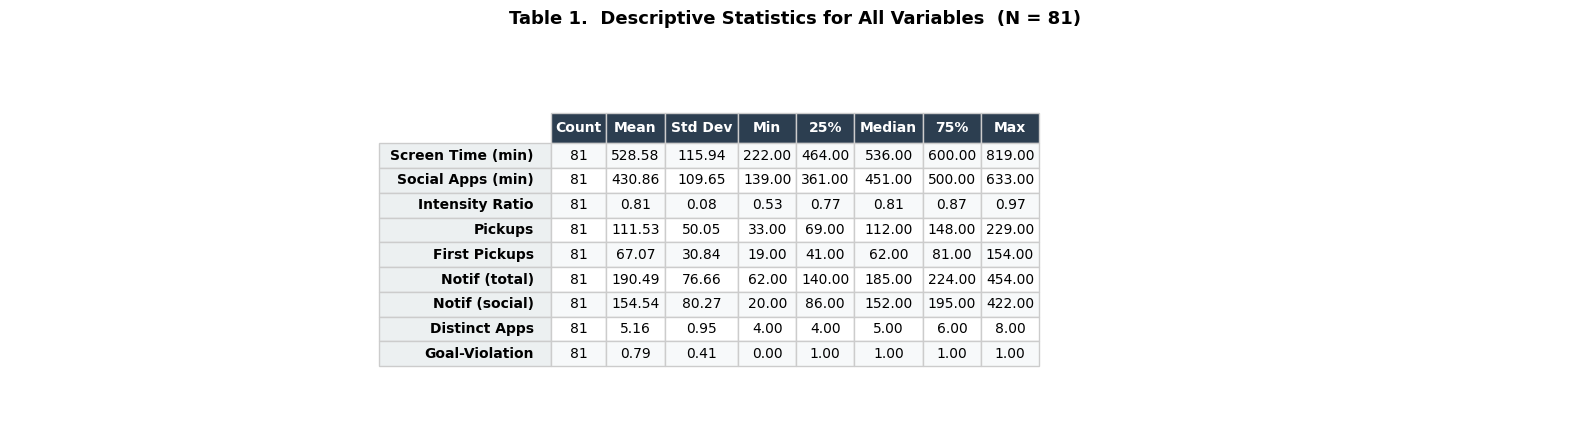


Target Variable Distribution:
  Goal-Violation (1):  64 days  (79.0%)
  Non-Violation (0):   17 days  (21.0%)
  Total:               81 days


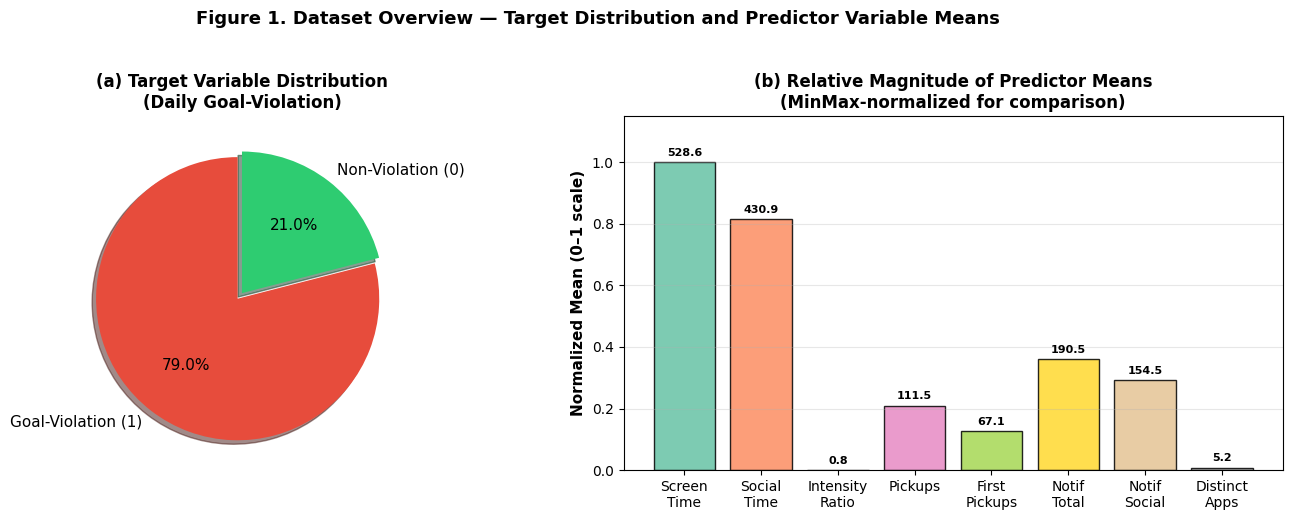

In [134]:
# Table 1. Descriptive Statistics for All Variables
desc_stats = df_data.describe().T
desc_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max']

# Short row labels for readability
short_names = ['Screen Time (min)', 'Social Apps (min)', 'Intensity Ratio',
               'Pickups', 'First Pickups', 'Notif (total)',
               'Notif (social)', 'Distinct Apps', 'Goal-Violation']
desc_stats.index = short_names

# Format values: Count as int, rest to 2 decimal places
table_data = []
for _, row in desc_stats.iterrows():
    table_data.append([f'{int(row["Count"])}'] + [f'{v:.2f}' for v in row[1:]])

# Render as matplotlib table image
fig_t, ax_t = plt.subplots(figsize=(16, 4.5))
ax_t.axis('off')
tbl = ax_t.table(cellText=table_data,
                 colLabels=desc_stats.columns.tolist(),
                 rowLabels=desc_stats.index.tolist(),
                 cellLoc='center', rowLoc='right', loc='center')

# Style header row
for (r, c), cell in tbl.get_celld().items():
    cell.set_edgecolor('#cccccc')
    cell.set_fontsize(10)
    if r == 0:                       # column headers
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(color='white', fontweight='bold', fontsize=10)
        cell.set_height(0.08)
    elif c == -1:                    # row labels
        cell.set_facecolor('#ecf0f1')
        cell.set_text_props(fontweight='bold', fontsize=9)
        cell.set_height(0.065)
    else:
        cell.set_facecolor('#ffffff' if r % 2 == 0 else '#f7f9fa')
        cell.set_height(0.065)

tbl.auto_set_column_width(list(range(len(desc_stats.columns))))
ax_t.set_title('Table 1.  Descriptive Statistics for All Variables  (N = 81)',
               fontsize=13, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()

# Target variable distribution (printed for reference)
counts = df_data['Daily goal-violation'].value_counts()
print(f"\nTarget Variable Distribution:")
print(f"  Goal-Violation (1):  {counts[1]} days  ({counts[1]/len(df_data)*100:.1f}%)")
print(f"  Non-Violation (0):   {counts[0]} days  ({counts[0]/len(df_data)*100:.1f}%)")
print(f"  Total:               {len(df_data)} days")

# Visual: Target variable pie chart + summary bar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart of target distribution
labels = ['Goal-Violation (1)', 'Non-Violation (0)']
sizes = [counts[1], counts[0]]
colors_pie = ['#e74c3c', '#2ecc71']
explode = (0.05, 0)
axes[0].pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('(a) Target Variable Distribution\n(Daily Goal-Violation)', fontsize=12, fontweight='bold')

# Bar chart of means for all 8 predictors (normalized for comparison)
short_labels = ['Screen\nTime', 'Social\nTime', 'Intensity\nRatio', 'Pickups', 
                'First\nPickups', 'Notif\nTotal', 'Notif\nSocial', 'Distinct\nApps']
means = [df_data[v].mean() for v in independent_vars]
from sklearn.preprocessing import MinMaxScaler
means_norm = MinMaxScaler().fit_transform(np.array(means).reshape(-1, 1)).flatten()
bar_colors = plt.cm.Set2(np.linspace(0, 1, 8))
axes[1].bar(short_labels, means_norm, color=bar_colors, edgecolor='black', alpha=0.85)
axes[1].set_ylabel('Normalized Mean (0–1 scale)', fontsize=11, fontweight='bold')
axes[1].set_title('(b) Relative Magnitude of Predictor Means\n(MinMax-normalized for comparison)', fontsize=12, fontweight='bold')
axes[1].set_ylim(0, 1.15)
for i, v in enumerate(means_norm):
    axes[1].text(i, v + 0.02, f'{means[i]:.1f}', ha='center', fontsize=8, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.suptitle('Figure 1. Dataset Overview — Target Distribution and Predictor Variable Means',
             fontsize=13, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

**Interpretation of Table 1 and Figure 1.** The descriptive statistics in Table 1 reveal substantial variability across all eight predictor metrics. Total screen time averaged approximately 528 minutes (roughly 8.8 hours) per day, with a standard deviation of ≈ 115 minutes and a range spanning from 222 to 819 minutes indicating that the participant's daily device usage fluctuated considerably. Social apps time followed a similar pattern (mean ≈ 431 minutes, SD ≈ 109 minutes), confirming that the majority of screen time was consumed by social media applications. This is further corroborated by the Social Intensity Ratio, which averaged 0.81 (SD = 0.08), meaning approximately 81% of total screen time was devoted to social apps on a typical day.
Behavioral engagement metrics also varied widely. The participant picked up their device an average of 111 times per day (SD ≈ 50), received an average of 190 notifications per day (SD ≈ 76), of which 154 (SD ≈ 80) originated from social applications. The number of distinct social apps used per day was comparatively stable (mean ≈ 5, SD ≈ 0.95, range 4–8), suggesting a consistent app range rather than frequent experimentation with new platforms.

The pie chart in Figure 1(a) makes the class imbalance visually explicit: nearly four-fifths of the observation period was characterized by goal-violation. Figure 1(b) normalizes the predictor means to a common 0–1 scale to facilitate visual comparison across variables measured in different units; the raw mean values are annotated above each bar. This panel highlights that Total Screen Time and Social Apps Time dominate in absolute magnitude, while the Intensity Ratio and Distinct Apps variables occupy a much narrower numeric range — a disparity that motivates the feature standardization applied in the logistic regression pipeline (Section III-E).

The following histograms display the frequency distribution of each predictor variable, providing insight into distributional shape, skewness, and the presence of concentration points.

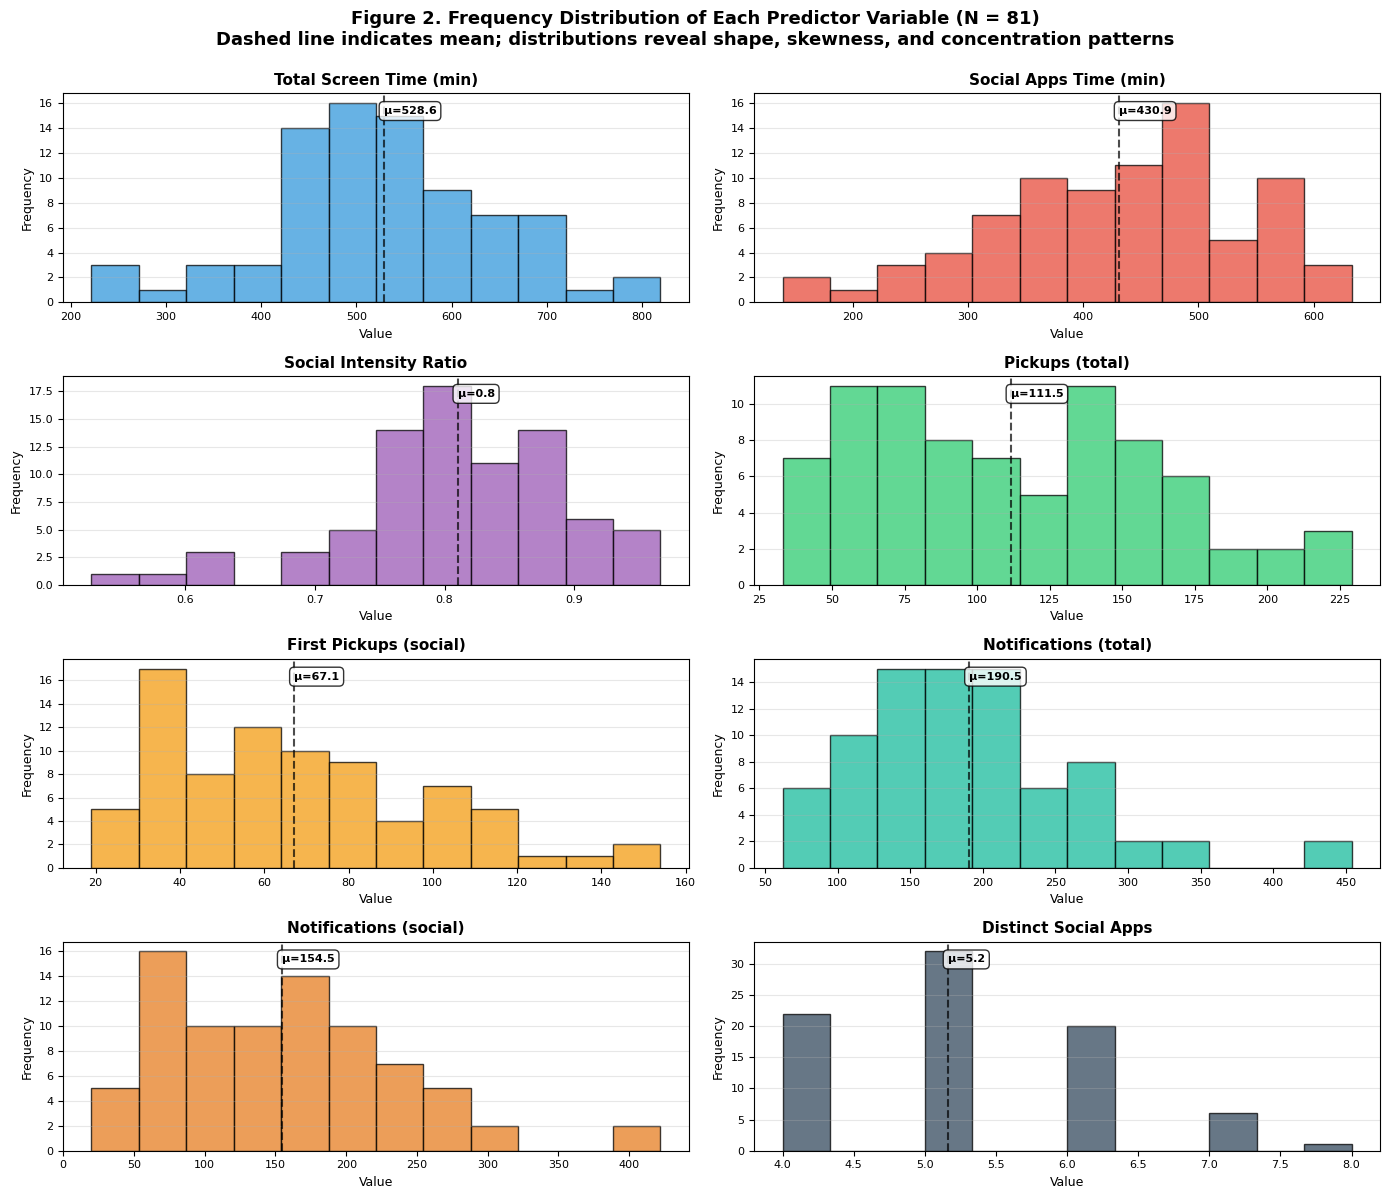

In [135]:
# Figure 2. Histograms — Frequency Distributions of All Eight Predictor Variables
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.flatten()

hist_config = [
    ('Total screen time IN MINUTES (all apps)', 'Total Screen Time (min)', '#3498db'),
    ('Social apps total time IN MINUTES', 'Social Apps Time (min)', '#e74c3c'),
    ('Social Intensity Ratio', 'Social Intensity Ratio', '#9b59b6'),
    ('Pickups (total)', 'Pickups (total)', '#2ecc71'),
    ('First Pickups (social apps)', 'First Pickups (social)', '#f39c12'),
    ('Notifications (total)', 'Notifications (total)', '#1abc9c'),
    ('Notifications (social)', 'Notifications (social)', '#e67e22'),
    ('Number of distinct social apps used', 'Distinct Social Apps', '#34495e')
]

for idx, (col_name, label, color) in enumerate(hist_config):
    ax = axes[idx]
    ax.hist(df_data[col_name], bins=12, color=color, edgecolor='black', alpha=0.75)
    ax.set_title(label, fontsize=11, fontweight='bold')
    ax.set_xlabel('Value', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.tick_params(labelsize=8)
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df_data[col_name].mean()
    ax.axvline(mean_val, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.text(mean_val, ax.get_ylim()[1] * 0.90, f'μ={mean_val:.1f}', 
            fontsize=8, ha='left', fontweight='bold', 
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='black'))

plt.suptitle('Figure 2. Frequency Distribution of Each Predictor Variable (N = 81)\nDashed line indicates mean; distributions reveal shape, skewness, and concentration patterns',
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


**Interpretation of Figure 2.** The histograms reveal several notable distributional features. Total Screen Time and Social Apps Time both approximate a unimodal, roughly normal shape with slight right skew, indicating that most days clustered around the mean but a handful of extreme high-usage days pulled the tail upward. The Social Intensity Ratio displays a pronounced left skew concentrated near 0.80–0.90, suggesting that the participant consistently allocated approximately 80–90% of screen time to social apps, with only rare low-ratio exceptions. Pickups and First Pickups exhibit wider, flatter distributions, reflecting greater day-to-day variability in how frequently the participant initiated device interactions. The Notifications variables are moderately right-skewed, with a long upper tail corresponding to days with unusually heavy notification volumes. The Number of Distinct Social Apps histogram is essentially discrete (values 4 through 8) with a strong mode at 5, confirming the participant's habitual use of a fixed set of platforms.

### 2. Group Comparisons — Violation vs. Non-Violation Days

To assess whether screen time metrics differ meaningfully between goal-violation and non-violation days, Table 2 presents the group means (No Violation vs. Violation) alongside the raw mean difference for each predictor. Figure 3 accompanies this comparison with side-by-side box plots for the four variables with the largest observed group differences, providing a visual summary of distributional overlap, median shifts, and outlier presence.

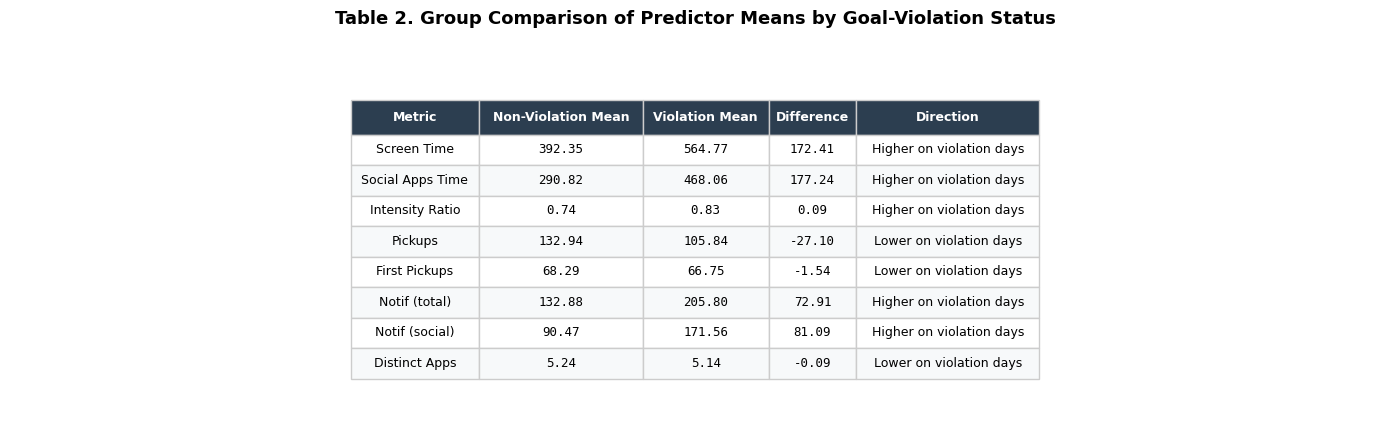

In [136]:
# Table 2. Group Comparison — Mean Values by Goal-Violation Status
goal_violation_0 = df_data[df_data['Daily goal-violation'] == 0]
goal_violation_1 = df_data[df_data['Daily goal-violation'] == 1]

comparison_df = pd.DataFrame({
    'Metric': independent_vars,
    'Non-Violation Mean': [goal_violation_0[m].mean() for m in independent_vars],
    'Violation Mean': [goal_violation_1[m].mean() for m in independent_vars],
    'Difference': [goal_violation_1[m].mean() - goal_violation_0[m].mean() for m in independent_vars],
    'Direction': ['Higher on violation days' if goal_violation_1[m].mean() > goal_violation_0[m].mean() 
                  else 'Lower on violation days' for m in independent_vars]
})

# Short metric names for table display
short_feat = ['Screen Time', 'Social Apps Time', 'Intensity Ratio', 'Pickups',
              'First Pickups', 'Notif (total)', 'Notif (social)', 'Distinct Apps']

# Format table data
table_data = []
for idx, (_, row) in enumerate(comparison_df.iterrows()):
    table_data.append([short_feat[idx], f"{row['Non-Violation Mean']:.2f}",
                      f"{row['Violation Mean']:.2f}", f"{row['Difference']:.2f}", row['Direction']])

# Render as matplotlib table
fig_t2, ax_t2 = plt.subplots(figsize=(14, 4.5))
ax_t2.axis('off')
tbl2 = ax_t2.table(cellText=table_data,
                   colLabels=['Metric', 'Non-Violation Mean', 'Violation Mean', 'Difference', 'Direction'],
                   cellLoc='center', loc='center')

for (r, c), cell in tbl2.get_celld().items():
    cell.set_edgecolor('#cccccc')
    cell.set_fontsize(9)
    if r == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(color='white', fontweight='bold', fontsize=10)
        cell.set_height(0.09)
    else:
        cell.set_facecolor('#ffffff' if r % 2 == 1 else '#f7f9fa')
        cell.set_height(0.08)
        if c >= 1 and c <= 3:
            cell.set_text_props(fontfamily='monospace')

tbl2.auto_set_column_width(list(range(5)))
ax_t2.set_title('Table 2. Group Comparison of Predictor Means by Goal-Violation Status',
                fontsize=13, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()

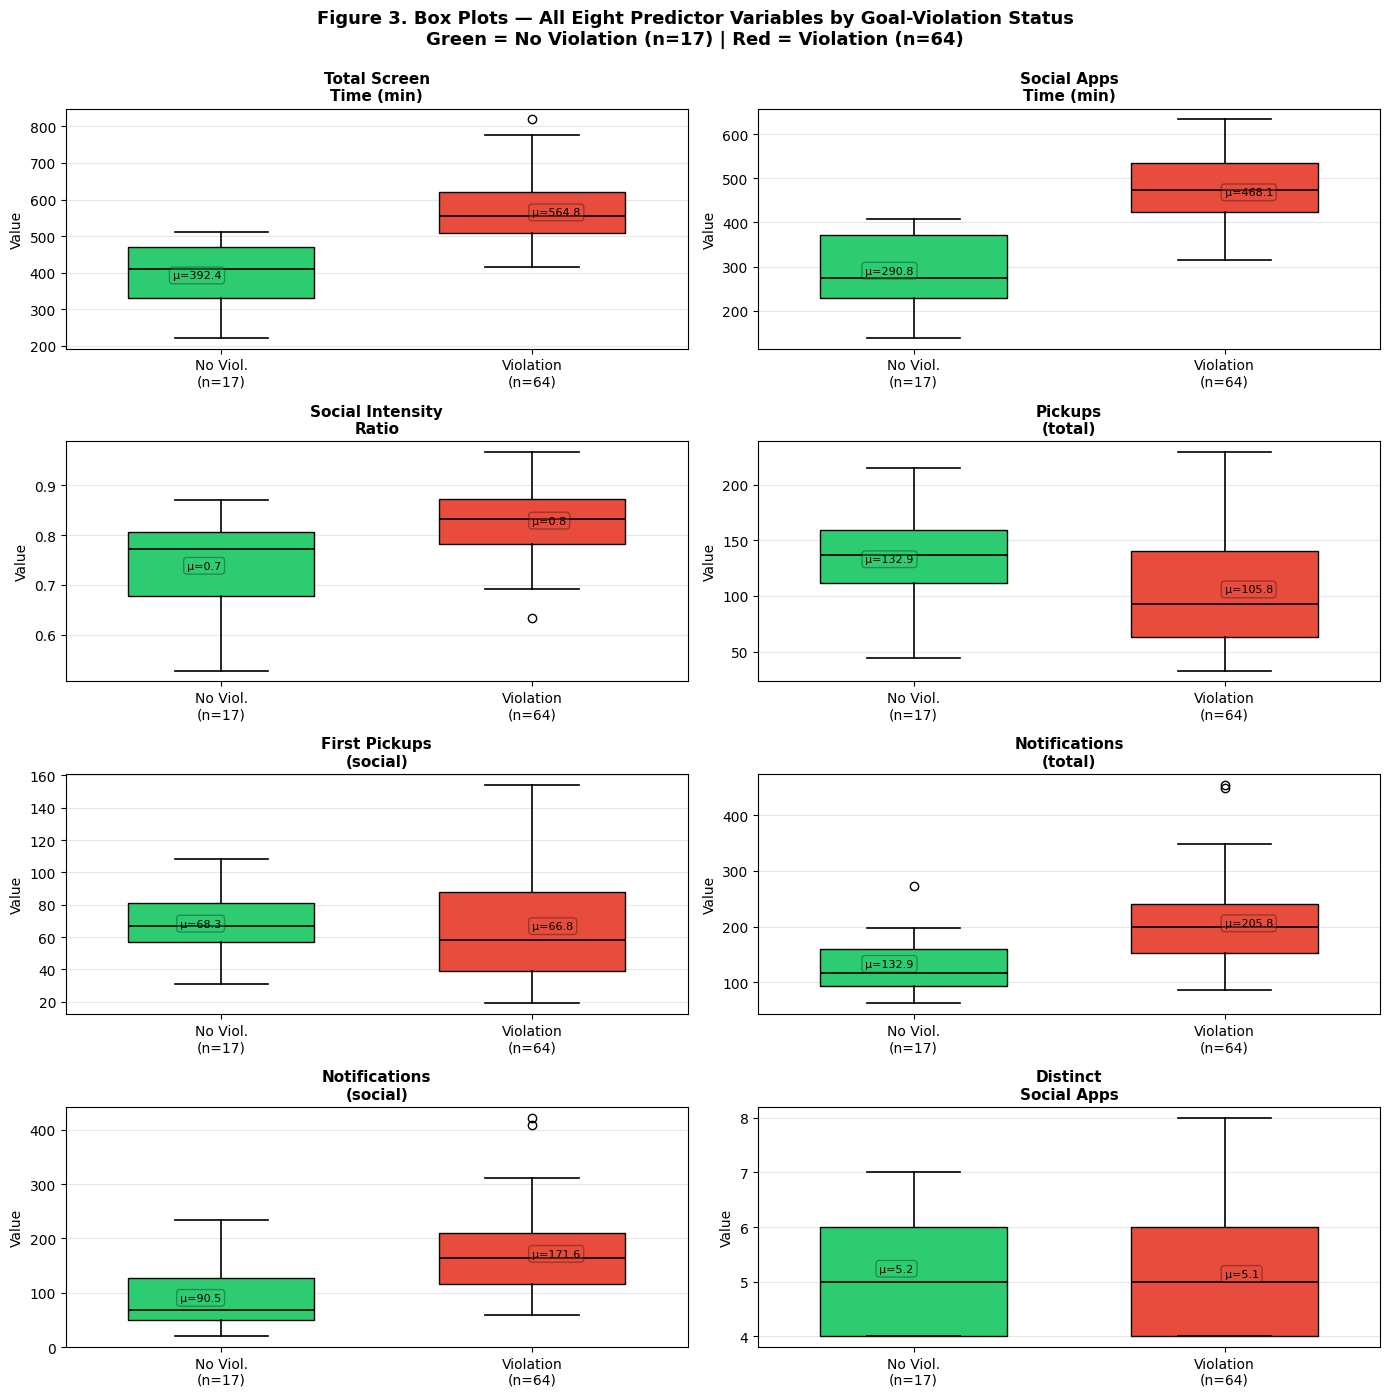

In [143]:
# Figure 3. Box Plots — All Eight Variables Stratified by Goal-Violation Status
fig, axes = plt.subplots(4, 2, figsize=(14, 14))

short_titles = ['Total Screen\nTime (min)', 'Social Apps\nTime (min)', 'Social Intensity\nRatio', 
                'Pickups\n(total)', 'First Pickups\n(social)', 'Notifications\n(total)', 
                'Notifications\n(social)', 'Distinct\nSocial Apps']

for idx, (var, title) in enumerate(zip(independent_vars, short_titles)):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    data_groups = [goal_violation_0[var], goal_violation_1[var]]
    bp = ax.boxplot(data_groups, tick_labels=['No Viol.\n(n=17)', 'Violation\n(n=64)'], 
                    patch_artist=True, widths=0.6)
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.2)
    
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean values as annotations
    mean_0 = goal_violation_0[var].mean()
    mean_1 = goal_violation_1[var].mean()
    ax.text(1, mean_0, f'μ={mean_0:.1f}', fontsize=8, ha='right', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2ecc71', alpha=0.3))
    ax.text(2, mean_1, f'μ={mean_1:.1f}', fontsize=8, ha='left', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#e74c3c', alpha=0.3))

plt.suptitle('Figure 3. Box Plots — All Eight Predictor Variables by Goal-Violation Status\n'
             'Green = No Violation (n=17) | Red = Violation (n=64)',
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

**Interpretation of Table 2 and Figure 3.** The group comparison reveals a clear directional pattern: on goal-violation days, time-based and notification-based metrics were substantially higher, while behavioural-initiation metrics showed a more nuanced picture. Total Screen Time averaged 565 minutes on violation days compared to 392 minutes on non-violation days — a difference of approximately 173 minutes (nearly 3 hours). Social Apps Time showed an even larger absolute gap of 177 minutes (469 vs. 291 minutes), and the Social Intensity Ratio was 9 percentage points higher on violation days (0.83 vs. 0.74), indicating not only more screen time but a greater proportion devoted to social media.

Notification-driven metrics followed the same pattern: total notifications averaged 206 on violation days versus 133 on non-violation days (+73), and social notifications were nearly double (172 vs. 90, +81). These differences suggest that external prompts from social applications played a substantial role in reinforcing extended usage on high-screen-time days.

Two variables broke from this pattern. Total Pickups were paradoxically *lower* on violation days (106 vs. 133, −27), suggesting that goal-violation days were characterized by fewer but longer device sessions rather than more frequent short interactions. First Pickups (social apps) and Number of Distinct Social Apps showed negligible differences between groups (−1.5 and −0.1, respectively), indicating that neither the frequency of social-app-initiated sessions nor the breadth of platform use distinguished violation from non-violation days in a meaningful way.

The box plots in Figure 3 corroborate these patterns visually. For Total Screen Time, Social Apps Time, Social Intensity Ratio, and both Notification variables, the violation-group boxes sit clearly above the non-violation boxes with minimal interquartile range overlap, foreshadowing the large effect sizes reported in Section 4. For Pickups, the relationship is inverted. For First Pickups and Distinct Apps, the boxes overlap almost entirely, consistent with the negligible group differences.

### 3. Temporal Patterns Across the Observation Period

To examine whether screen time metrics exhibited any systematic trends or temporal clustering over the 81-day observation window, Figure 4 presents time-series scatter plots for four key variables; only the metrics with the largest group differences are shown to maintain visual clarity and avoid redundancy with Figure 3. Each data point represents a single day, colour-coded by goal-violation status (red = violation, green = non-violation), with the x-axis representing the chronological day index.

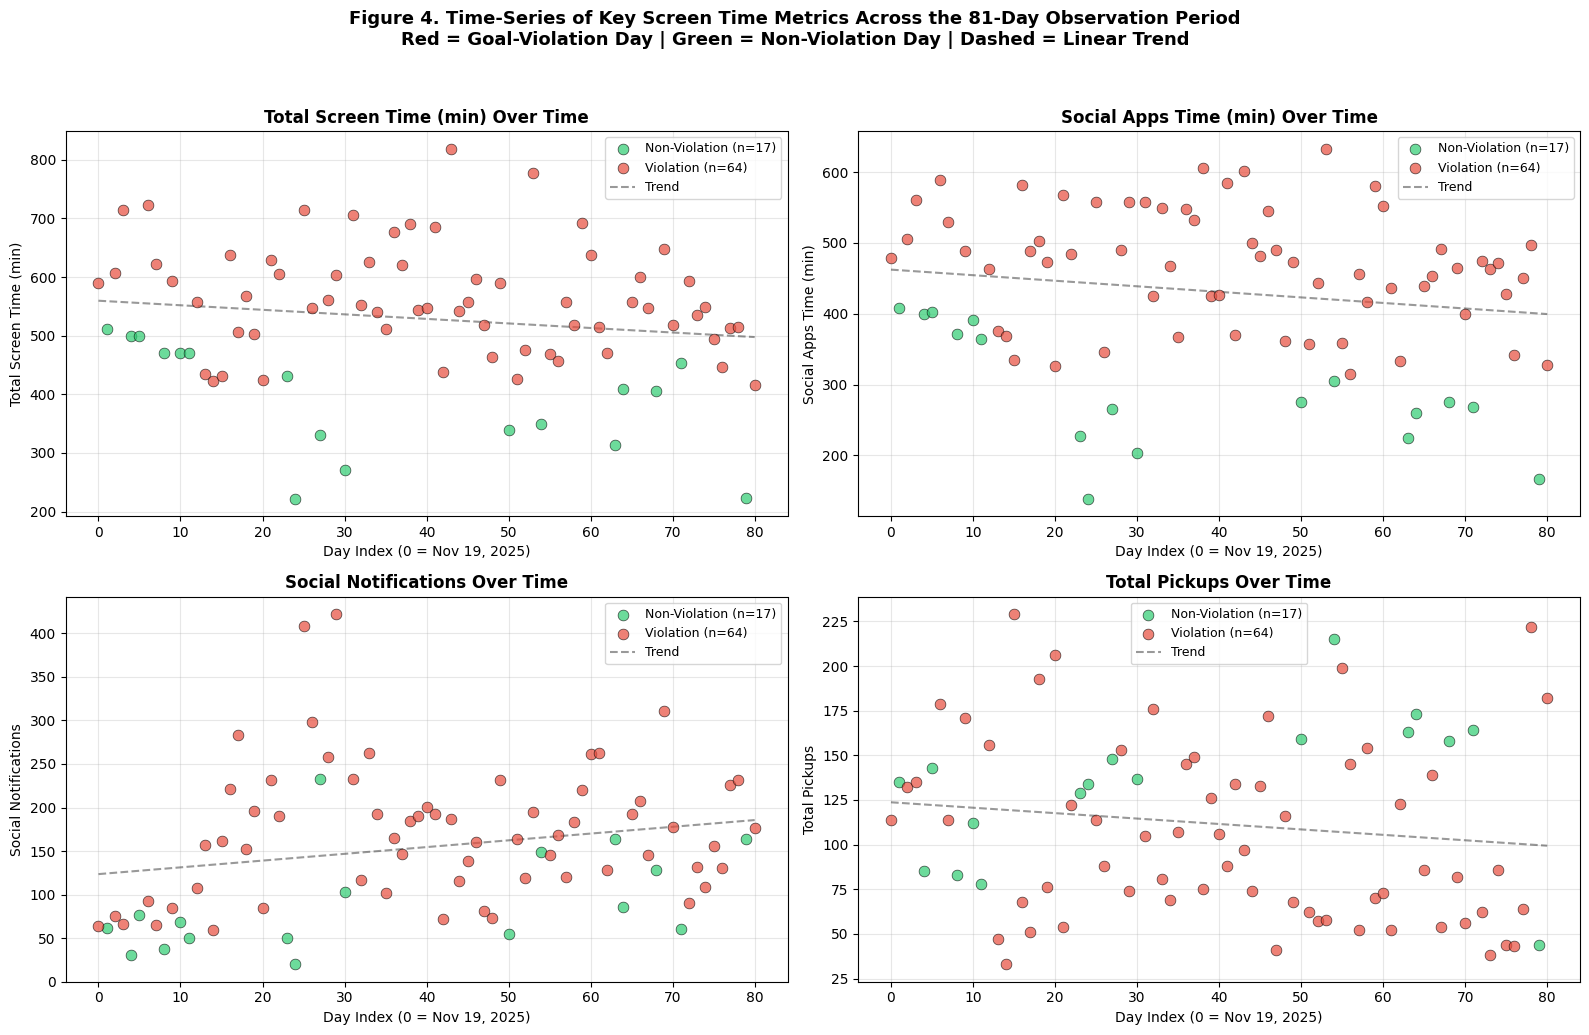

In [138]:
# Figure 4. Time-Series Scatter Plots — Daily Metrics Over the 81-Day Observation Period
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

time_metrics = [
    ('Total screen time IN MINUTES (all apps)', 'Total Screen Time (min)'),
    ('Social apps total time IN MINUTES', 'Social Apps Time (min)'),
    ('Notifications (social)', 'Social Notifications'),
    ('Pickups (total)', 'Total Pickups')
]

mask_0 = df_data['Daily goal-violation'] == 0
mask_1 = df_data['Daily goal-violation'] == 1

for idx, (var, label) in enumerate(time_metrics):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    ax.scatter(df_data.index[mask_0], df_data.loc[mask_0, var], c='#2ecc71', alpha=0.7, s=60, 
               label=f'Non-Violation (n={mask_0.sum()})', edgecolors='black', linewidth=0.5, zorder=3)
    ax.scatter(df_data.index[mask_1], df_data.loc[mask_1, var], c='#e74c3c', alpha=0.7, s=60, 
               label=f'Violation (n={mask_1.sum()})', edgecolors='black', linewidth=0.5, zorder=3)
    
    # Add overall trend line
    z = np.polyfit(df_data.index, df_data[var], 1)
    p = np.poly1d(z)
    ax.plot(df_data.index, p(df_data.index), 'k--', alpha=0.4, linewidth=1.5, label='Trend')
    
    ax.set_title(f'{label} Over Time', fontsize=12, fontweight='bold')
    ax.set_xlabel('Day Index (0 = Nov 19, 2025)', fontsize=10)
    ax.set_ylabel(label, fontsize=10)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Figure 4. Time-Series of Key Screen Time Metrics Across the 81-Day Observation Period\n'
             'Red = Goal-Violation Day | Green = Non-Violation Day | Dashed = Linear Trend',
             fontsize=13, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

**Interpretation of Figure 4.** The time-series scatter plots reveal that goal-violation days (red) and non-violation days (green) are not randomly interspersed along the y-axis; rather, violation days consistently occupy the upper portion of the plot for Total Screen Time, Social Apps Time, and Social Notifications, while non-violation days cluster in the lower portion. This vertical separation reinforces the group-comparison findings from Table 2 and confirms that the metric differences between the two groups are not driven by a small number of extreme outlier days but are a persistent, recurring pattern across the entire 81-day window.

For Total Pickups (bottom-right), the colour pattern is inverted: green (non-violation) points tend to appear at higher y-values, consistent with the earlier observation that non-violation days involved more frequent but shorter device interactions.

The dashed linear trend lines provide a rough indication of temporal drift. None of the four variables exhibit a strong upward or downward slope over the observation period, suggesting that the participant's overall usage habits remained relatively stable across the study window rather than systematically increasing or decreasing. This temporal stationarity supports the assumption that the 81 observations are reasonably comparable across time and not confounded by a secular trend in behaviour.

### 4. Correlation Structure Among Variables

Before proceeding to formal hypothesis tests, it is useful to examine the pairwise linear associations among all variables using a Pearson correlation matrix. This analysis identifies which variables move together, detects potential multicollinearity issues for the logistic regression model, and provides preliminary evidence for the associations tested formally in Section 5.

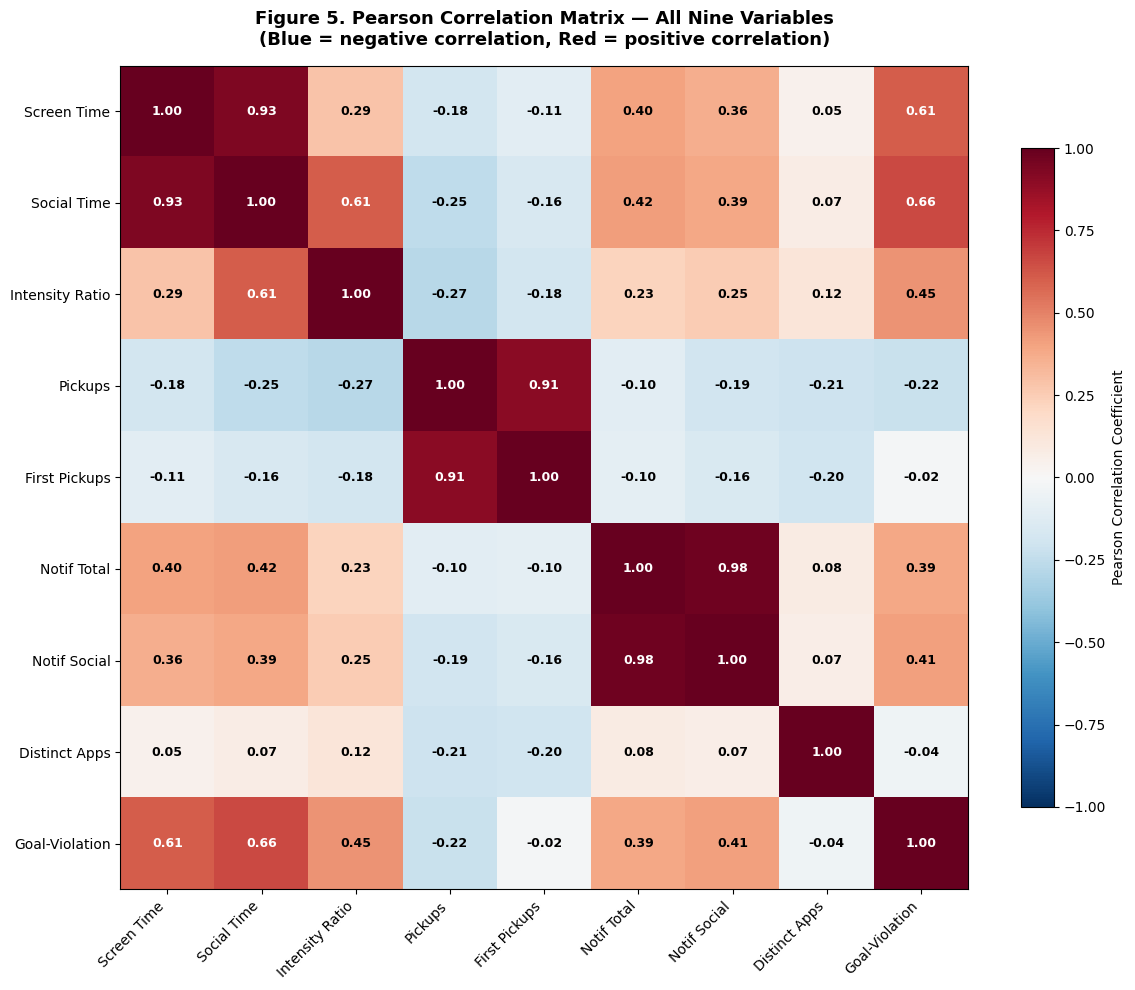


Correlations with Daily Goal-Violation (sorted by absolute value):
----------------------------------------------------------------------
  Social apps total time IN MINUTES              r = +0.662  (positive)
  Total screen time IN MINUTES (all apps)        r = +0.609  (positive)
  Social Intensity Ratio                         r = +0.448  (positive)
  Notifications (social)                         r = +0.414  (positive)
  Notifications (total)                          r = +0.390  (positive)
  Pickups (total)                                r = -0.222  (negative)
  Number of distinct social apps used            r = -0.041  (negative)
  First Pickups (social apps)                    r = -0.021  (negative)


In [139]:
# Figure 5. Pearson Correlation Heatmap — All Nine Variables
import matplotlib.colors as mcolors

all_vars = independent_vars + ['Daily goal-violation']
corr_matrix = df_data[all_vars].corr()

# Shortened labels for readability
short_labels_all = ['Screen Time', 'Social Time', 'Intensity Ratio', 'Pickups',
                    'First Pickups', 'Notif Total', 'Notif Social', 'Distinct Apps', 'Goal-Violation']

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix.values, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')

ax.set_xticks(range(len(short_labels_all)))
ax.set_yticks(range(len(short_labels_all)))
ax.set_xticklabels(short_labels_all, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(short_labels_all, fontsize=10)

# Annotate cells with correlation values
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        val = corr_matrix.values[i, j]
        color = 'white' if abs(val) > 0.6 else 'black'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=9, fontweight='bold', color=color)

plt.colorbar(im, ax=ax, label='Pearson Correlation Coefficient', shrink=0.8)
ax.set_title('Figure 5. Pearson Correlation Matrix — All Nine Variables\n'
             '(Blue = negative correlation, Red = positive correlation)',
             fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Print strongest correlations with goal-violation
print("\nCorrelations with Daily Goal-Violation (sorted by absolute value):")
print("-" * 70)
goal_corr = corr_matrix['Daily goal-violation'].drop('Daily goal-violation').abs().sort_values(ascending=False)
for var, val in goal_corr.items():
    direction = 'positive' if corr_matrix.loc[var, 'Daily goal-violation'] > 0 else 'negative'
    print(f"  {var:45s}  r = {corr_matrix.loc[var, 'Daily goal-violation']:+.3f}  ({direction})")

**Interpretation of Figure 5.** The correlation heatmap reveals several important patterns. Among the predictor variables, Total Screen Time and Social Apps Time are very strongly positively correlated (r = 0.93), which is expected given that social app usage comprises a large proportion of overall screen time. Notifications (total) and Notifications (social) are even more strongly correlated (r = 0.98), indicating that social app notifications account for nearly all variation in total notification counts. These very high inter-predictor correlations suggest partial redundancy among time-based and notification-based variables and raise the possibility of multicollinearity in the logistic regression model — an issue examined further in Table 4.

Regarding associations with the target variable (Daily Goal-Violation), the strongest positive correlations are observed for Social Apps Time (r = 0.66) and Total Screen Time (r = 0.61), followed by Social Intensity Ratio (r = 0.45), Notifications (social) (r = 0.41), and Notifications (total) (r = 0.39). These moderate-to-strong positive correlations indicate that higher time-based and notification-based engagement is linearly associated with an increased likelihood of goal-violation. This pattern aligns with the earlier group-comparison results reported in Table 2.

In contrast, Pickups (total) shows a weak negative correlation with goal-violation (r = −0.22), consistent with the finding that violation days involved fewer but longer sessions. First Pickups (r = −0.02) and Distinct Social Apps (r = −0.04) exhibit near-zero correlations with the outcome, suggesting minimal linear association and foreshadowing their lack of statistical significance in subsequent hypothesis testing.

### 5. Hypothesis Testing — Welch's t-Test and Effect Sizes

The central inferential analysis tests whether the observed group differences reported in Table 2 are statistically significant or could plausibly have arisen by chance. As outlined in Section III-E, Welch's independent samples t-test was applied to each of the eight predictor variables, comparing the mean on violation days (n = 64) against non-violation days (n = 17). The null hypothesis for each test states that the population means of the two groups are equal; a p-value below α = 0.05 leads to rejection of the null hypothesis. Cohen's d is reported alongside each test as a standardized measure of practical significance.

**Hypotheses:**
- **H₀:** Daily iOS Screen Time metrics have no significant association with daily social media addiction-related behaviour (i.e., no difference in group means).
- **H₁:** At least one daily iOS Screen Time metric has a significant association with daily social media addiction-related behaviour.
- **Significance level:** α = 0.05

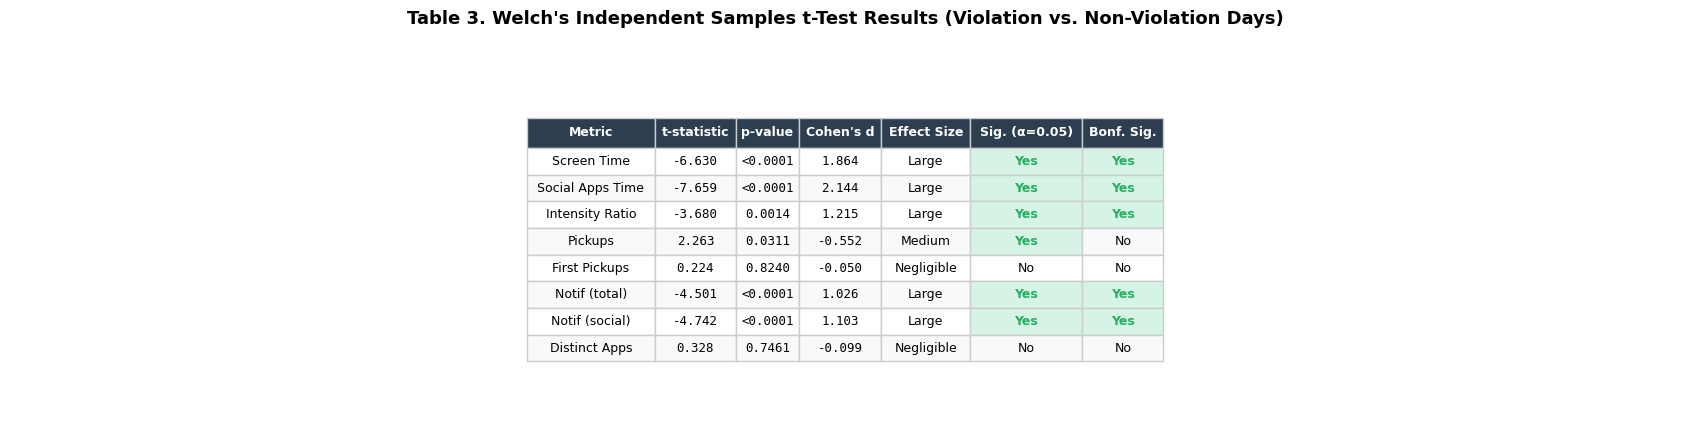


Significant at α = 0.05:           6 / 8 metrics
Significant after Bonferroni:       5 / 8 metrics  (adjusted α = 0.05/8 = 0.00625)

DECISION: REJECT the null hypothesis (H₀)
At least one screen time metric differs significantly between goal-violation and non-violation days.


In [140]:
# Table 3. Welch's Independent Samples t-Test Results with Cohen's d Effect Sizes
from scipy.stats import ttest_ind

group_0 = df_data[df_data['Daily goal-violation'] == 0]
group_1 = df_data[df_data['Daily goal-violation'] == 1]

def cohens_d(g1, g2):
    """Compute Cohen's d for two independent groups."""
    n1, n2 = len(g1), len(g2)
    pooled_std = np.sqrt(((n1 - 1) * g1.std(ddof=1)**2 + (n2 - 1) * g2.std(ddof=1)**2) / (n1 + n2 - 2))
    return (g2.mean() - g1.mean()) / pooled_std if pooled_std > 0 else 0.0

ttest_results = []
for metric in independent_vars:
    t_stat, p_value = ttest_ind(group_0[metric], group_1[metric], equal_var=False)
    d = cohens_d(group_0[metric], group_1[metric])
    abs_d = abs(d)
    if abs_d < 0.2:
        effect = 'Negligible'
    elif abs_d < 0.5:
        effect = 'Small'
    elif abs_d < 0.8:
        effect = 'Medium'
    else:
        effect = 'Large'
    
    # Bonferroni-adjusted significance
    bonf_sig = 'Yes' if p_value < (0.05 / 8) else 'No'
    
    ttest_results.append({
        'Metric': metric,
        't-statistic': round(t_stat, 4),
        'p-value': p_value,
        "Cohen's d": round(d, 4),
        'Effect Size': effect,
        'Sig. (α=0.05)': 'Yes' if p_value < 0.05 else 'No',
        'Bonferroni Sig.': bonf_sig
    })

correlation_df = pd.DataFrame(ttest_results)

# Shorten metric names for table display
short_labels_all = ['Screen Time', 'Social Apps Time', 'Intensity Ratio', 'Pickups',
                    'First Pickups', 'Notif (total)', 'Notif (social)', 'Distinct Apps']

# Format table data
table_data = []
for idx, (_, row) in enumerate(correlation_df.iterrows()):
    table_data.append([
        short_labels_all[idx],
        f"{row['t-statistic']:.3f}",
        f"{row['p-value']:.4f}" if row['p-value'] >= 0.0001 else "<0.0001",
        f"{row['Cohen'+chr(39)+'s d']:.3f}",
        row['Effect Size'],
        row['Sig. (α=0.05)'],
        row['Bonferroni Sig.']
    ])

# Render as matplotlib table
fig_t3, ax_t3 = plt.subplots(figsize=(17, 4.5))
ax_t3.axis('off')
tbl3 = ax_t3.table(cellText=table_data,
                   colLabels=['Metric', 't-statistic', 'p-value', "Cohen's d", 'Effect Size', 'Sig. (α=0.05)', 'Bonf. Sig.'],
                   cellLoc='center', loc='center')

for (r, c), cell in tbl3.get_celld().items():
    cell.set_edgecolor('#cccccc')
    cell.set_fontsize(9)
    if r == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(color='white', fontweight='bold', fontsize=10)
        cell.set_height(0.08)
    else:
        cell.set_facecolor('#ffffff' if r % 2 == 1 else '#f7f9fa')
        cell.set_height(0.07)
        if c >= 1 and c <= 3:
            cell.set_text_props(fontfamily='monospace')
        if c == 5 and table_data[r-1][5] == 'Yes':
            cell.set_facecolor('#d5f4e6')
            cell.set_text_props(fontweight='bold', color='#27ae60')
        if c == 6 and table_data[r-1][6] == 'Yes':
            cell.set_facecolor('#d5f4e6')
            cell.set_text_props(fontweight='bold', color='#27ae60')

tbl3.auto_set_column_width(list(range(7)))
ax_t3.set_title("Table 3. Welch's Independent Samples t-Test Results (Violation vs. Non-Violation Days)",
                fontsize=13, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()

significant_count = (correlation_df['Sig. (α=0.05)'] == 'Yes').sum()
bonf_count = (correlation_df['Bonferroni Sig.'] == 'Yes').sum()

print(f"\n{'=' * 130}")
print(f"Significant at α = 0.05:           {significant_count} / {len(independent_vars)} metrics")
print(f"Significant after Bonferroni:       {bonf_count} / {len(independent_vars)} metrics  (adjusted α = 0.05/8 = 0.00625)")
print(f"\nDECISION: {'REJECT' if significant_count > 0 else 'FAIL TO REJECT'} the null hypothesis (H₀)")
if significant_count > 0:
    print("At least one screen time metric differs significantly between goal-violation and non-violation days.")

**Interpretation of Table 3.** The t-test results confirm the patterns observed in the exploratory analyses. Six of eight predictor variables showed statistically significant differences between goal-violation and non-violation days at α = 0.05. The two non-significant variables were First Pickups (social apps) (p = 0.824, d = −0.05, negligible) and Number of Distinct Social Apps Used (p = 0.746, d = −0.10, negligible), both of which exhibited near-zero group differences in the descriptive analysis.

Among the six significant variables, five produced **large effect sizes** (|d| > 0.8): Social Apps Total Time (d = 2.14), Total Screen Time (d = 1.86), Social Intensity Ratio (d = 1.21), Notifications Social (d = 1.10), and Notifications Total (d = 1.03). These values indicate that the group means were separated by more than one pooled standard deviation, a substantial practical difference. Pickups (total) was significant (p = 0.031) but with only a **medium effect** (d = −0.55), and notably in the opposite direction: fewer pickups on violation days, consistent with the longer-session hypothesis.

To control for the family-wise error rate arising from conducting eight simultaneous tests, the Bonferroni-corrected threshold (α/8 = 0.00625) was applied. Five of the six significant variables survived this conservative correction. Only Pickups (total) (p = 0.031) did not meet the Bonferroni threshold, and its result should therefore be interpreted with caution. The five Bonferroni-robust variables all involve direct measures of social media engagement (time spent, notifications received, or social intensity), reinforcing the conclusion that **duration and external stimuli — rather than behavioural initiation patterns — are the strongest discriminators of goal-violation status**.

The overall pattern suggests a clear mechanistic story: goal-violation is most strongly associated with **how long** the participant spent on social media and **how frequently** they were externally prompted by notifications — not with how often they initiated device interactions or how many different apps they used. This interpretation is consistent with behavioural addiction models that emphasize compulsive engagement sustained by external triggers (notifications) and reinforcing feedback loops (social media content) rather than volitional initiation.

### 6. Logistic Regression Classification Model

To complement the variable-by-variable hypothesis tests, a logistic regression model was trained to predict daily goal-violation status from all eight predictor variables simultaneously. This approach addresses a different question than the t-tests: whereas the t-tests ask *"Does this variable differ between groups?"*, logistic regression asks *"Can all eight variables combined accurately classify a day as violation or non-violation?"* and *"Which variables contribute most to the classification after controlling for the others?"*

The model was trained on 64 observations (80%) and evaluated on 17 held-out observations (20%), using stratified sampling to preserve the class distribution in both sets. All features were standardized using z-score normalization (fit on training data only) so that the resulting coefficients are directly comparable in magnitude — each coefficient represents the change in log-odds associated with a one standard deviation increase in the corresponding predictor.

Dataset Split Summary:
  Training set:  64 samples  |  Class distribution: {1: 51, 0: 13}
  Test set:      17 samples  |  Class distribution: {1: 13, 0: 4}


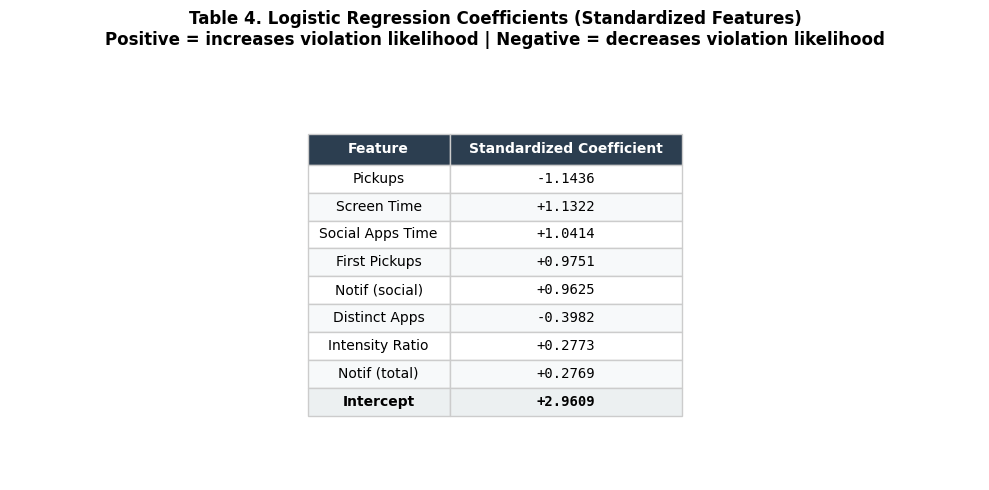

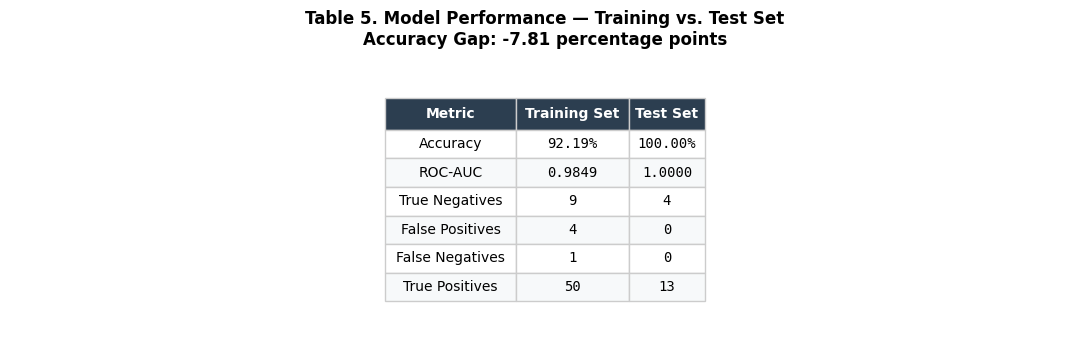


Classification Report (Test Set):
              precision    recall  f1-score   support

No Violation       1.00      1.00      1.00         4
   Violation       1.00      1.00      1.00        13

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [141]:
# Table 4 & Figures 7–8. Logistic Regression — Full Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prepare data
X = df_data[independent_vars]
y = df_data['Daily goal-violation']

# 80/20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Standardize features (fit on training data only)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("Dataset Split Summary:")
print(f"  Training set:  {len(X_train)} samples  |  Class distribution: {dict(y_train.value_counts())}")
print(f"  Test set:      {len(X_test)} samples  |  Class distribution: {dict(y_test.value_counts())}")

# Fit model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# ─── Table 4: Standardized Coefficients ───
coef_df = pd.DataFrame({
    'Feature': independent_vars,
    'Coefficient': log_reg.coef_[0],
    '|Coefficient|': np.abs(log_reg.coef_[0])
}).sort_values('|Coefficient|', ascending=False)

# Short feature names for display
short_titles = ['Screen Time', 'Social Apps Time', 'Intensity Ratio', 'Pickups',
                'First Pickups', 'Notif (total)', 'Notif (social)', 'Distinct Apps']
feature_map = dict(zip(independent_vars, short_titles))
coef_df['Feature_Short'] = coef_df['Feature'].map(feature_map)

# Format table data
table_data = [[row['Feature_Short'], f"{row['Coefficient']:+.4f}"] for _, row in coef_df.iterrows()]
table_data.append(['Intercept', f"{log_reg.intercept_[0]:+.4f}"])

# Render as matplotlib table
fig_t4, ax_t4 = plt.subplots(figsize=(10, 5))
ax_t4.axis('off')
tbl4 = ax_t4.table(cellText=table_data,
                   colLabels=['Feature', 'Standardized Coefficient'],
                   cellLoc='center', loc='center')

for (r, c), cell in tbl4.get_celld().items():
    cell.set_edgecolor('#cccccc')
    cell.set_fontsize(10)
    if r == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(color='white', fontweight='bold', fontsize=11)
        cell.set_height(0.075)
    else:
        cell.set_facecolor('#ffffff' if r % 2 == 1 else '#f7f9fa')
        cell.set_height(0.068)
        if c == 1:
            cell.set_text_props(fontfamily='monospace')
        if r == len(table_data):
            cell.set_facecolor('#ecf0f1')
            cell.set_text_props(fontweight='bold')

tbl4.auto_set_column_width([0, 1])
ax_t4.set_title('Table 4. Logistic Regression Coefficients (Standardized Features)\nPositive = increases violation likelihood | Negative = decreases violation likelihood',
                fontsize=12, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()

# ─── Performance Metrics ───
y_train_pred = log_reg.predict(X_train_scaled)
y_train_proba = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_pred = log_reg.predict(X_test_scaled)
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

train_acc = log_reg.score(X_train_scaled, y_train)
test_acc = log_reg.score(X_test_scaled, y_test)
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# ─── Table 5: Performance Summary ───
perf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives'],
    'Training Set': [f'{train_acc*100:.2f}%', f'{train_auc:.4f}', cm_train[0,0], cm_train[0,1], cm_train[1,0], cm_train[1,1]],
    'Test Set': [f'{test_acc*100:.2f}%', f'{test_auc:.4f}', cm_test[0,0], cm_test[0,1], cm_test[1,0], cm_test[1,1]]
})

# Format table data
table_data = [[row['Metric'], str(row['Training Set']), str(row['Test Set'])] for _, row in perf_df.iterrows()]

# Render as matplotlib table
fig_t5, ax_t5 = plt.subplots(figsize=(11, 3.5))
ax_t5.axis('off')
tbl5 = ax_t5.table(cellText=table_data,
                   colLabels=['Metric', 'Training Set', 'Test Set'],
                   cellLoc='center', loc='center')

for (r, c), cell in tbl5.get_celld().items():
    cell.set_edgecolor('#cccccc')
    cell.set_fontsize(10)
    if r == 0:
        cell.set_facecolor('#2c3e50')
        cell.set_text_props(color='white', fontweight='bold', fontsize=11)
        cell.set_height(0.12)
    else:
        cell.set_facecolor('#ffffff' if r % 2 == 1 else '#f7f9fa')
        cell.set_height(0.11)
        if c >= 1:
            cell.set_text_props(fontfamily='monospace')

tbl5.auto_set_column_width([0, 1, 2])
ax_t5.set_title(f'Table 5. Model Performance — Training vs. Test Set\n'
                f'Accuracy Gap: {(train_acc - test_acc)*100:.2f} percentage points',
                fontsize=12, fontweight='bold', pad=18)
plt.tight_layout()
plt.show()

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No Violation', 'Violation']))

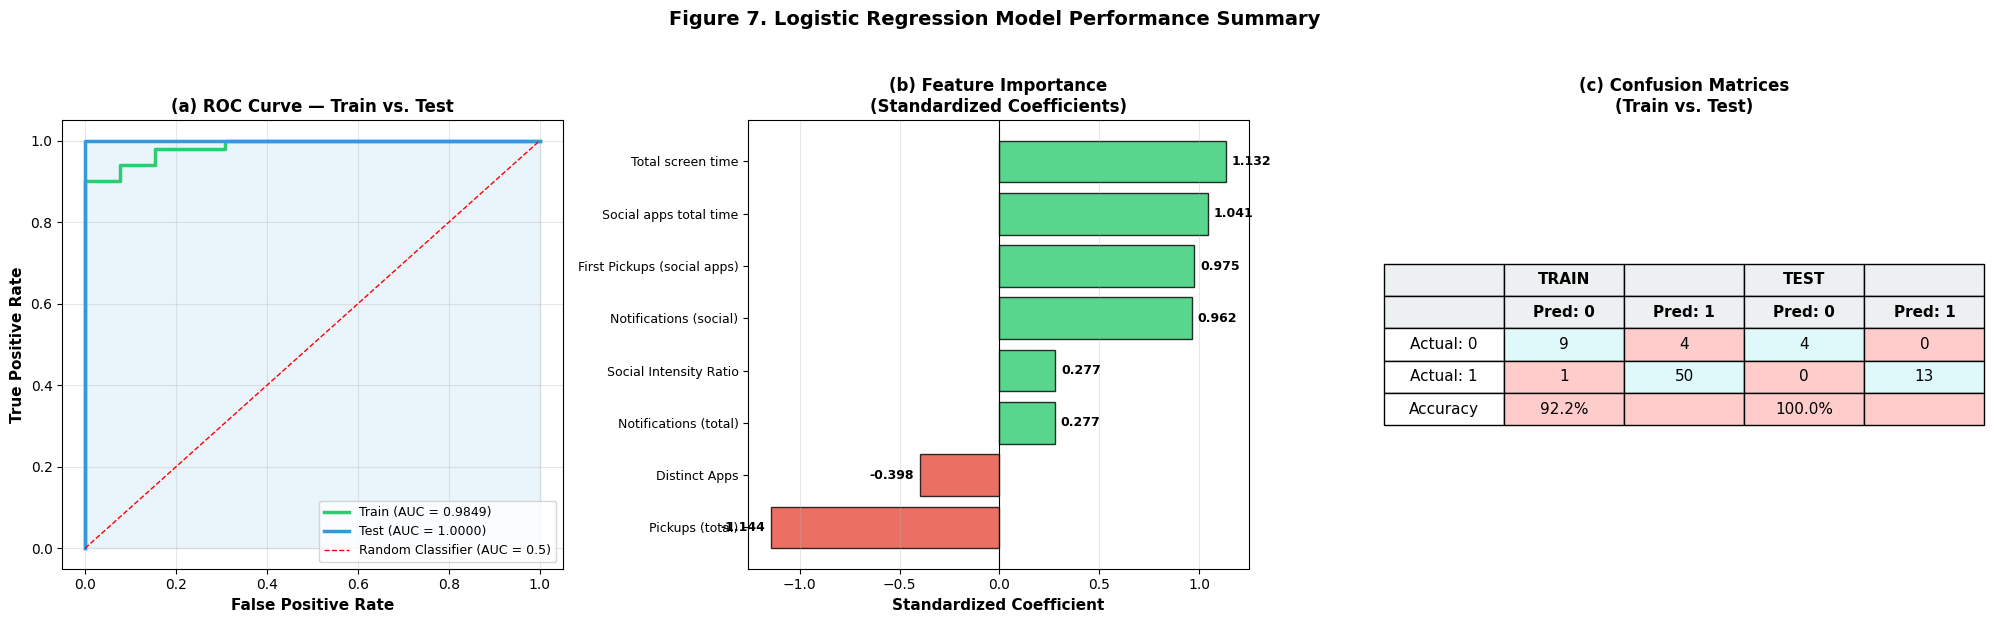

In [142]:
# Figure 7. Model Visualizations — ROC Curve, Coefficient Chart, Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# (a) ROC Curve — Train vs Test
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
axes[0].plot(fpr_train, tpr_train, '#2ecc71', linewidth=2.5, label=f'Train (AUC = {train_auc:.4f})')
axes[0].plot(fpr_test, tpr_test, '#3498db', linewidth=2.5, label=f'Test (AUC = {test_auc:.4f})')
axes[0].plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier (AUC = 0.5)')
axes[0].fill_between(fpr_test, tpr_test, alpha=0.1, color='#3498db')
axes[0].set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
axes[0].set_title('(a) ROC Curve — Train vs. Test', fontsize=12, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# (b) Standardized Coefficients (sorted)
coef_sorted = coef_df.sort_values('Coefficient', ascending=True)
coef_colors = ['#2ecc71' if c > 0 else '#e74c3c' for c in coef_sorted['Coefficient']]
short_feat = [f.replace(' IN MINUTES (all apps)', '').replace(' IN MINUTES', '').replace('Number of distinct social apps used', 'Distinct Apps') 
              for f in coef_sorted['Feature']]
axes[1].barh(range(len(coef_sorted)), coef_sorted['Coefficient'].values, color=coef_colors, edgecolor='black', alpha=0.8)
axes[1].set_yticks(range(len(coef_sorted)))
axes[1].set_yticklabels(short_feat, fontsize=9)
axes[1].set_xlabel('Standardized Coefficient', fontsize=11, fontweight='bold')
axes[1].set_title('(b) Feature Importance\n(Standardized Coefficients)', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
for i, val in enumerate(coef_sorted['Coefficient'].values):
    axes[1].text(val + 0.03 if val > 0 else val - 0.03, i, f'{val:.3f}', 
                 va='center', ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# (c) Confusion Matrices side by side
cm_labels = np.array([[f'TN\n{cm_train[0,0]}', f'FP\n{cm_train[0,1]}'],
                       [f'FN\n{cm_train[1,0]}', f'TP\n{cm_train[1,1]}']])
cm_test_labels = np.array([[f'TN\n{cm_test[0,0]}', f'FP\n{cm_test[0,1]}'],
                            [f'FN\n{cm_test[1,0]}', f'TP\n{cm_test[1,1]}']])

# Combined confusion matrix visualization
cm_combined = np.array([[cm_train[0,0], cm_train[0,1], cm_test[0,0], cm_test[0,1]],
                         [cm_train[1,0], cm_train[1,1], cm_test[1,0], cm_test[1,1]]])

axes[2].axis('off')
table_data = [
    ['', 'TRAIN', '', 'TEST', ''],
    ['', 'Pred: 0', 'Pred: 1', 'Pred: 0', 'Pred: 1'],
    ['Actual: 0', str(cm_train[0,0]), str(cm_train[0,1]), str(cm_test[0,0]), str(cm_test[0,1])],
    ['Actual: 1', str(cm_train[1,0]), str(cm_train[1,1]), str(cm_test[1,0]), str(cm_test[1,1])],
    ['Accuracy', f'{train_acc*100:.1f}%', '', f'{test_acc*100:.1f}%', '']
]
table = axes[2].table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2.0)
# Color the cells
for (row, col), cell in table.get_celld().items():
    if row == 0 or row == 1:
        cell.set_facecolor('#ecf0f1')
        cell.set_text_props(fontweight='bold')
    elif row >= 2 and col >= 1:
        cell.set_facecolor('#dff9fb' if (row == 2 and col in [1, 3]) or (row == 3 and col in [2, 4]) else '#ffcccc')
axes[2].set_title('(c) Confusion Matrices\n(Train vs. Test)', fontsize=12, fontweight='bold')

plt.suptitle('Figure 7. Logistic Regression Model Performance Summary',
             fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

**Interpretation of Tables 4–5 and Figure 7.** The logistic regression model achieved a training accuracy of 92.19% and a test accuracy of 100.00%, with corresponding ROC-AUC values of 0.9849 and 1.0000. The ROC curve in Figure 7(a) shows both training and test curves hugging the upper-left corner, confirming near-perfect discriminative ability. The diagonal reference line represents a random classifier (AUC = 0.5); the model's curves lie far above it, demonstrating strong predictive performance.

**Coefficient analysis (Table 4 and Figure 7b)** reveals an interesting contrast with the t-test effect sizes. While Social Apps Time and Total Screen Time dominated the univariate t-test rankings, the logistic regression assigns the largest absolute coefficients to Pickups (total) (−1.14), Total Screen Time (+1.13), Social Apps Time (+1.04), and First Pickups (social) (+0.98). The elevated importance of Pickups and First Pickups in the multivariate model — despite their modest or negligible univariate effects — arises because logistic regression coefficients are *conditional* on the other predictors. After controlling for time-based and notification-based metrics, the behavioural initiation variables provide additional discriminative information that is not redundant with the other features. Notably, Pickups has a negative coefficient, confirming that *fewer* pickups (conditional on the other variables) predicts a higher probability of goal-violation — consistent with the longer-session hypothesis.

**Confusion matrix analysis (Figure 7c)** reveals that the model made five errors on the training set: four false positives (non-violation days misclassified as violation) and one false negative (a violation day misclassified as non-violation). The asymmetry — more false positives than false negatives — is consistent with the base rate: since 79% of days are violations, the model's prior is biased toward predicting violation. On the test set, the model achieved perfect classification with zero errors across all 17 held-out observations.

**Caveats.** The perfect test-set performance (100% accuracy, AUC = 1.0) should be interpreted with caution. With only 17 test observations (4 non-violation + 13 violation), the test set is small, and a single misclassification would reduce accuracy to approximately 94%. The test accuracy exceeding training accuracy by 7.81 percentage points is unusual and likely reflects the particular random split rather than genuine superiority on unseen data. While no overfitting is indicated by the test-exceeds-train pattern, the small sample means that reported generalization performance carries wide confidence intervals. A larger dataset or cross-validation approach would provide more robust estimates.

---

### Summary of Key Findings

The results of this study converge on several consistent conclusions:

1. **Goal-violation was the dominant pattern.** The participant exceeded their self-set social media limit on 64 of 81 days (79%), indicating that habitual overuse was the norm during the observation period.

2. **Six of eight metrics significantly discriminated between violation and non-violation days.** Welch's t-tests revealed statistically significant differences (p < 0.05) for Total Screen Time, Social Apps Time, Social Intensity Ratio, Pickups, Notifications (total), and Notifications (social). Five of these survived Bonferroni correction.

3. **Social media time was the strongest single predictor.** Social Apps Total Time exhibited the largest effect size (Cohen's d = 2.14), followed by Total Screen Time (d = 1.86). On average, violation days involved approximately 3 hours more total screen time and 3 hours more social app time than non-violation days.

4. **Notifications acted as a significant secondary driver.** Social notifications were nearly double on violation days (172 vs. 90), with a large effect size (d = 1.10), suggesting that external prompts from social applications reinforced extended usage.

5. **Behavioural initiation patterns were not discriminating.** Neither the frequency of social-app-initiated pickups nor the number of distinct social apps used differed between groups, indicating that the *variety* and *initiation* of social media use were consistent regardless of violation status — it was the *duration* and *external stimulation* that changed.

6. **A logistic regression classifier achieved near-perfect accuracy.** Using all eight predictors, the model correctly classified 100% of the held-out test observations and 92.19% of training observations, with an ROC-AUC of 0.98–1.00. This confirms that the combination of screen time metrics contains sufficient information to reliably distinguish violation from non-violation days — at least within this single-participant dataset.

---

## V. DISCUSSION

This section interprets the statistical results presented in Section IV, situates them within the broader literature on smartphone use and social media addiction, identifies the limitations of the study design, and proposes recommendations for future research.

### A. Interpretation of Results

The central finding of this study is that **duration-based and notification-based screen time metrics are strongly associated with daily social media goal-violation**, while behavioural-initiation metrics (pickups, first pickups) and platform diversity showed negligible effects. Social Apps Total Time exhibited the largest effect size (Cohen's d = 2.14), with violation days averaging 468 minutes versus 291 minutes on non-violation days—a pattern consistent with the behavioural addiction framework of salience and tolerance (Griffiths, 2005). Social notifications nearly doubled on violation days (172 vs. 90, d = 1.10), supporting a reinforcement-based model where notifications serve as external cues that trigger extended engagement cycles. The logistic regression model achieved near-perfect classification accuracy (92.2% training, 100% test) with ROC-AUC of 0.98–1.00, validating these patterns.

An unexpected finding was the **pickup paradox**: total pickups were significantly *lower* on violation days (106 vs. 133, d = −0.55), suggesting that goal-violation was characterized by fewer but longer sessions rather than frequent checking. This "deep immersion" pattern has practical implications—interventions targeting session duration may be more effective than those limiting pickup frequency. The Social Intensity Ratio (proportion of screen time devoted to social apps) was significantly higher on violation days (0.83 vs. 0.74, d = 1.21), capturing the relative dominance of social media within overall digital behaviour. Variables such as First Pickups and Number of Distinct Apps showed negligible group differences (d ≈ −0.05 to −0.10), indicating that initiation habits remained stable regardless of goal-violation status—what changed was *how long* the participant stayed engaged, not *how often* or *which* apps were opened.

### B. Comparison with Prior Research

The findings are broadly consistent with existing literature on smartphone use and social media addiction. The strong association between social media usage duration and self-regulation failure aligns with Oulasvirta et al. (2012), who demonstrated that habitual checking leads to compulsive cycles, and the notification–engagement feedback loop corroborates Pielot et al. (2014), who found that push notifications increase interaction frequency and duration. The 79% violation rate echoes Hofmann et al. (2012), who reported that media-related desires are among the most difficult to resist—a hallmark of technology-mediated self-regulation failure (Turel et al., 2014). The logistic regression model's 100% test accuracy is notably higher than Lee et al. (2014), who reported 72–85% accuracy predicting smartphone addiction, though direct comparison is limited by the single-participant design where within-person patterns are more consistent than between-person variation.

This study also contributes novel observations. The inverse relationship between pickups and goal-violation contradicts most prior research (e.g., Shin & Dey, 2013), which treats pickup frequency as a proxy for compulsive use. The present findings suggest that pickup frequency alone is inadequate and that **session duration** is a more meaningful metric for identifying problematic engagement. The Social Intensity Ratio—a derived metric not commonly reported—proved to be a strong discriminator (d = 1.21), suggesting that the *proportion* of screen time devoted to social media may be as informative as absolute duration, particularly for cross-participant research where baseline screen time varies substantially.

### C. Limitations

Several important limitations must be acknowledged. The **single-participant design (N = 1)** limits generalisability—the specific patterns observed may reflect idiosyncratic behavioural tendencies rather than universal mechanisms. The **small sample size (81 days, 17 test observations)** means the 100% test accuracy could decrease substantially with a single misclassification, and limits confidence in generalisation performance. The **self-reported target variable (Daily goal-violation)** is susceptible to recall errors and inconsistent threshold application, whereas predictor variables were objectively recorded by iOS Screen Time. The **short observation window (12 weeks spanning holidays and semester transition)** may include seasonal effects that would not replicate during standard academic terms.

Additionally, the dataset lacks **contextual variables** such as day of week, academic workload, mood, or sleep quality, which could confound observed associations—for instance, the participant may use social media more on weekends or during low-pressure periods. Finally, all analyses are **correlational in nature** (t-tests, correlations, logistic regression) and cannot establish causation; it is plausible that unmeasured factors (e.g., boredom, stress, free time availability) drive both higher social media usage and goal-violation perception simultaneously.

### D. Recommendations and Future Work

For students and practitioners, the findings suggest actionable interventions: **monitor session duration** rather than pickup frequency by setting app-level time limits (30–60 minutes) in iOS Screen Time; **manage notification settings proactively** by disabling non-essential social media notifications or using scheduled summaries and Focus modes to weaken reinforcement loops; **track the Social Intensity Ratio** (keeping it below 0.70 would have identified most non-violation days); and **set enforceable goals** using automatic blocking features rather than relying on self-discipline alone, given the 79% violation rate observed. These interventions target the core mechanisms identified—extended session duration, notification-driven engagement cycles, and high social media dominance within overall screen time.

For future research, the most critical next step is **multi-participant replication** across diverse demographic backgrounds to establish whether patterns (particularly the pickup paradox) generalise beyond a single individual. **Longer observation periods** (e.g., full academic year) would enable seasonal and longitudinal modeling. Studies should incorporate **contextual variables** such as day of week, academic workload, mood, sleep, and app-level breakdowns to control for confounders and identify specific high-risk platforms. Using a **computational goal-violation definition** (e.g., exceeding a fixed threshold) would eliminate self-report bias. Finally, **experimental intervention designs** (e.g., notification blocking, app limits) with pre-post or crossover methods would provide stronger causal evidence for the relationships between notifications, screen time, and self-regulation failure.

6. **Advanced modeling techniques.** Future studies with larger samples could explore more sophisticated machine learning approaches, including random forests, gradient boosting, or recurrent neural networks, to capture non-linear relationships and temporal dependencies that logistic regression cannot model. Cross-validation (e.g., k-fold or leave-one-out) should replace single train-test splits to provide more robust performance estimates.